In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='ignore')


import pandas as pd
from datetime import datetime
import csv
import os

%matplotlib inline
path='images/'

Rough_DATA_NotAnomalyInPairs = pd.read_csv("Ecological_data.csv")
Rough_DATA_NotAnomalyInPairs = Rough_DATA_NotAnomalyInPairs.set_index('DateTime')

In [2]:
Rough_DATA_NotAnomalyInPairs

date   time  t.m_ber  p.m_ber  h.m_ber  ws.m_ber  \
DateTime                                                                   
2019-01-01 00:00  2019-01-01  00:00    -22.1    764.2     79.0       1.3   
2019-01-01 00:20  2019-01-01  00:20    -22.5    764.2     78.0       1.0   
2019-01-01 00:40  2019-01-01  00:40    -22.9    764.2     78.0       0.8   
2019-01-01 01:00  2019-01-01  01:00    -22.8    764.2     79.0       1.1   
2019-01-01 01:20  2019-01-01  01:20    -22.5    764.2     79.0       0.8   
...                      ...    ...      ...      ...      ...       ...   
2022-12-31 22:20  2022-12-31  22:20    -20.6    766.6     72.0       2.3   
2022-12-31 22:40  2022-12-31  22:40    -20.7    766.6     73.0       2.6   
2022-12-31 23:00  2022-12-31  23:00    -21.0    766.5     73.0       2.2   
2022-12-31 23:20  2022-12-31  23:20    -21.3    766.5     73.0       2.5   
2022-12-31 23:40  2022-12-31  23:40    -21.3    766.3     73.0       4.1   

                  wd.m_ber  pm25.m_ber  t.m_che  p.m_che  ...  h.s_uda  \
DateTime                                                  ...            
2019-01-01 00:00     179.0         NaN    -20.5    762.7  ...    71.23   
2019-01-01 00:20     173.0         NaN    -20.3    762.7  ...    71.44   
2019-01-01 00:40     167.0         NaN    -20.2    762.7  ...    72.43   
2019-01-01 01:00     171.0         NaN    -20.0    762.7  ...    72.49   
2019-01-01 01:20     175.0         NaN    -19.7    762.7  ...    72.00   
...                    ...         ...      ...      ...  ...      ...   
2022-12-31 22:20     316.0        15.0    -20.3    766.1  ...    72.22   
2022-12-31 22:40     314.0        10.0    -20.3    766.1  ...    72.09   
2022-12-31 23:00     311.0        11.0    -20.4    766.0  ...    71.96   
2022-12-31 23:20     314.0        16.0    -20.5    766.0  ...    71.83   
2022-12-31 23:40     313.0        15.0    -20.6    766.0  ...    71.77   

                  ws.s_uda  wd.s_uda  pm25.s_uda  t.s_vet  p.s_vet  h.s_vet  \
DateTime                                                                      
2019-01-01 00:00       NaN       NaN       20.90   -23.59   759.05    65.03   
2019-01-01 00:20       NaN       NaN       47.19   -23.46   759.05    63.99   
2019-01-01 00:40       NaN       NaN       19.40   -23.66   759.09    64.68   
2019-01-01 01:00       NaN       NaN       19.00   -23.61   759.17    64.65   
2019-01-01 01:20       NaN       NaN       16.00   -23.83   759.14    64.92   
...                    ...       ...         ...      ...      ...      ...   
2022-12-31 22:20       NaN       NaN      108.00   -21.65   762.28    89.25   
2022-12-31 22:40       NaN       NaN      110.50   -21.70   762.19    89.41   
2022-12-31 23:00       NaN       NaN       89.00   -21.80   762.17    88.62   
2022-12-31 23:20       NaN       NaN      207.76   -21.90   762.15    87.60   
2022-12-31 23:40       NaN       NaN      140.26   -22.09   762.19    85.44   

                  ws.s_vet  wd.s_vet  pm25.s_vet  
DateTime                                          
2019-01-01 00:00       NaN       NaN      586.57  
2019-01-01 00:20       NaN       NaN      651.95  
2019-01-01 00:40       NaN       NaN      672.69  
2019-01-01 01:00       NaN       NaN      720.69  
2019-01-01 01:20       NaN       NaN      680.76  
...                    ...       ...         ...  
2022-12-31 22:20       NaN       NaN      183.00  
2022-12-31 22:40       NaN       NaN      131.26  
2022-12-31 23:00       NaN       NaN      147.26  
2022-12-31 23:20       NaN       NaN      146.00  
2022-12-31 23:40       NaN       NaN      191.76  

[105192 rows x 182 columns]

# 0. Data generation

## 0.1 Well-separated modes

In [5]:
from numpy import random
#random_state = 200
#random.state = random_state
#random.seed = random_state
random.seed(42)
size = 2000 

d1 = random.normal(loc=0.1, scale=0.2, size=size)
print(d1)
d2 = random.normal(loc=0.9, scale=0.2, size=size)
d= np.hstack([d1,d2])
cl = np.hstack([[0]*size,[1]*size]) 
bimodal_FarSimilarModes = pd.DataFrame(data = {'data': d, 'true_class': cl})
#bimodal_FarSimilarModes=bimodal_FarSimilarModes.sample(frac=1).reset_index(drop=True)
bimodal_FarSimilarModes

[ 0.19934283  0.07234714  0.22953771 ... -0.07637493  0.06738661
 -0.04898053]


data  true_class
0     0.199343           0
1     0.072347           0
2     0.229538           0
3     0.404606           0
4     0.053169           0
...        ...         ...
3995  0.905692           1
3996  0.484438           1
3997  0.835940           1
3998  1.228676           1
3999  0.972130           1

[4000 rows x 2 columns]

In [6]:
bimodal_FarSimilarModes['data'].hist(bins=100)

<Axes: >

## 0.2 Weak-separated modes

In [8]:
d1 = random.normal(loc=0.1, scale=0.2, size=size)
d2 = random.normal(loc=0.9, scale=0.4, size=size)
d= np.hstack([d1,d2])
cl = np.hstack([[0]*size,[1]*size]) 
bimodal_FarDifferentModes = pd.DataFrame(data = {'data': d, 'true_class': cl})
#bimodal_FarDifferentModes=bimodal_FarDifferentModes.sample(frac=1).reset_index(drop=True)
bimodal_FarDifferentModes

data  true_class
0    -0.072699           0
1     0.093759           0
2     0.103603           0
3     0.194526           0
4    -0.173372           0
...        ...         ...
3995  1.783942           1
3996  1.030798           1
3997  0.565950           1
3998  1.561165           1
3999  1.731111           1

[4000 rows x 2 columns]

In [9]:
bimodal_FarDifferentModes['data'].hist(bins= 100)

<Axes: >

## 0.3 Fuzzy modes

In [11]:
#random_state = 200
#np.random.state = random_state
#np.random.seed = random_state



d1 = random.normal(loc=0.3, scale=0.2, size=size)
d2 = random.normal(loc=0.7, scale=0.2, size=size)
d= np.hstack([d1,d2])
cl = np.hstack([[0]*size,[1]*size]) 
bimodal_NearSimilarModes = pd.DataFrame(data = {'data': d, 'true_class': cl})
#bimodal_NearSimilarModes=bimodal_NearSimilarModes.sample(frac=1).reset_index(drop=True)
bimodal_NearSimilarModes

data  true_class
0     0.293395           0
1     0.199270           0
2     0.265525           0
3     0.442946           0
4     0.555571           0
...        ...         ...
3995  0.463761           1
3996  0.685436           1
3997  0.867603           1
3998  0.679861           1
3999  0.510737           1

[4000 rows x 2 columns]

In [12]:
bimodal_NearSimilarModes['data'].hist(bins= 100)

<Axes: >

## 0.4. Non-stationary TS

In [14]:
from scipy.interpolate import lagrange

X = np.array([1, 1.5, 2, 2.5,3, 4, 5,5.5,6,6.5,7])
Y = np.array([0.5,2.,2.5,2.5, 2.5,2.3,1.5,1.5,1.5,1.5,1.5])
poly = lagrange(X, Y)

from numpy.polynomial.polynomial import Polynomial
Polynomial(poly.coef[::-1]).coef


array([-4.15444444e+01,  1.51315099e+02, -2.47613925e+02,  2.38972945e+02,
       -1.45697841e+02,  5.78876768e+01, -1.51393535e+01,  2.57838063e+00,
       -2.74708995e-01,  1.66062744e-02, -4.34396879e-04])

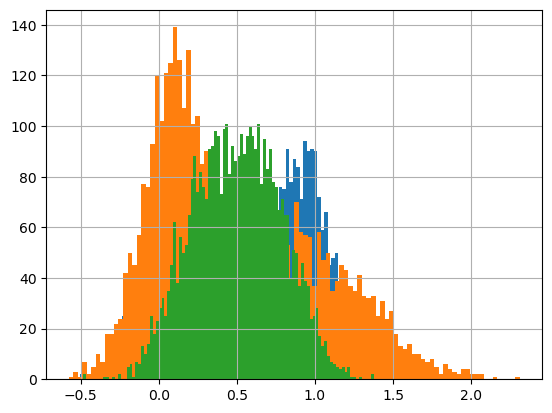

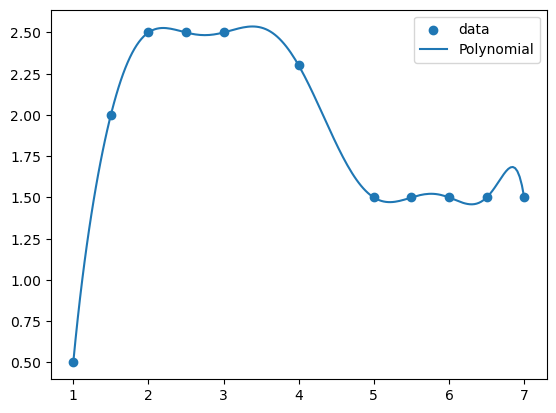

In [15]:
plt.figure()
x_new = np.linspace(1,7,200)
plt.scatter(X, Y, label='data')
plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='Polynomial')
plt.legend()
plt.show()


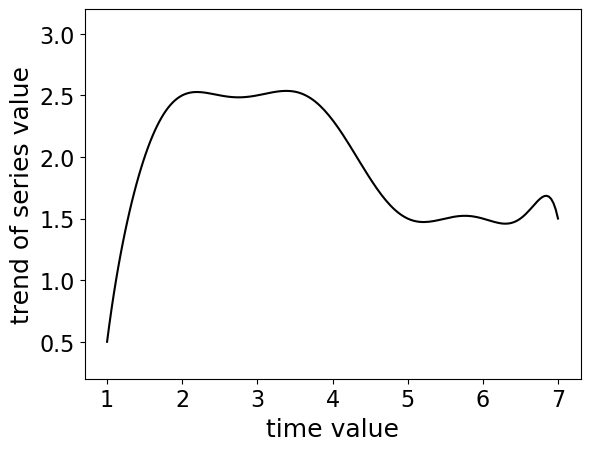

In [16]:
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.figure()
#plt.figure(figsize=(10,5))
x_new = np.linspace(1,7,200)
plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='Trend', color='black')
plt.xlabel("time value",size=18)
plt.ylabel("trend of series value",size=18)
plt.ylim([0.2,3.2])
plt.savefig(path+"synt_MotiveTrend.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_MotiveTrend.png",bbox_inches = 'tight', dpi = 300)
plt.show()

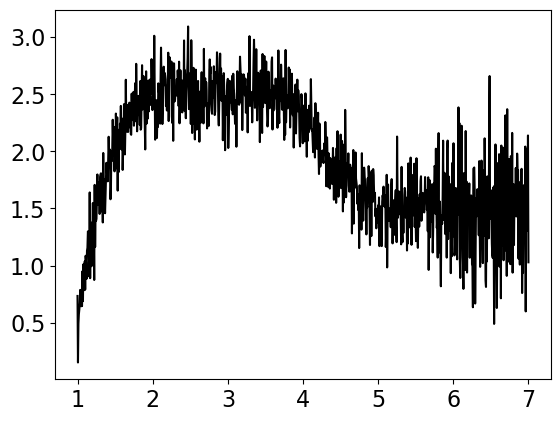

In [17]:
X_points = np.linspace(1,7,1000)
Y_points = Polynomial(poly.coef[::-1])(X_points)

Y_noise = Y_points.copy()
eps1 = np.random.normal(0, 0.2, Y_noise[0:800].shape[0])
eps2 = np.random.normal(0, 0.4, Y_noise[800:].shape[0])

Y_noise[0:800] = Y_noise[0:800] + eps1
Y_noise[800:] = Y_noise[800] + eps2

plt.figure()
plt.plot(X_points,Y_noise,color='black')
plt.show()

In [18]:
MotivationData = pd.DataFrame(data={"X":X_points ,"Y": Y_noise})

MotivationData

X         Y
0    1.000000  0.734963
1    1.006006  0.152894
2    1.012012  0.491395
3    1.018018  0.576470
4    1.024024  0.615426
..        ...       ...
995  6.975976  1.303921
996  6.981982  1.490393
997  6.987988  1.310691
998  6.993994  2.138792
999  7.000000  1.029245

[1000 rows x 2 columns]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

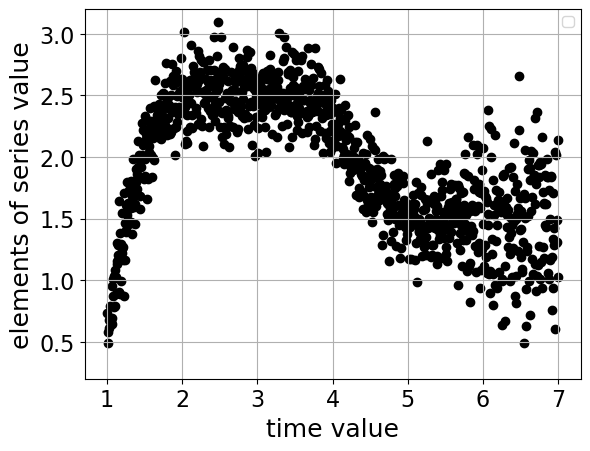

In [19]:
plt.figure()
#plt.figure(figsize=(10,5))
plt.figure()
plt.scatter(x=MotivationData['X'], y = MotivationData['Y'], c = 'black')
plt.xlabel("time value",size=18)
plt.ylabel("elements of series value",size=18)
plt.ylim([0.2,3.2])
plt.legend()
plt.grid(True)
plt.savefig(path+"synt_Motive.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_Motive.png",bbox_inches = 'tight', dpi = 300)
plt.show()

# 1. Implementation of Threshold method

In [21]:
def discr_method_func (d, bns=100):
    y,x = np.histogram(d, bins=bns)
    y = y/sum(y)
    x = x[0:-1]
    mu_max = sum(x*y)
    disp_T = np.sum((x-mu_max)*(x-mu_max)*y)
    p0 = []
    p1 = []
    for i in range(x.shape[0]): 
        p0.append(sum(y[0:i+1]))
        p1.append(sum(y[i+1:x.shape[0]+1]))

    mu0 = []
    mu1 = []

    for i in range(x.shape[0]): 
        mu0.append(sum(x[0:i+1]*y[0:i+1]))
        mu1.append(sum(x[i+1:x.shape[0]+1]*y[i+1:x.shape[0]+1]))

    disp_B = p0*(mu0 - mu_max)*(mu0 - mu_max) + p1*(mu1 - mu_max)*(mu1 - mu_max) 
    nu = disp_B/disp_T 
    
    max_value = np.max(nu)
    indices = [index for index, val in enumerate(nu) if val == max_value]
    
    T = x[indices[0]]
    return nu, T

## 1.1. Threshold algo for Well-Separated modes

Histogram of the original distribution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


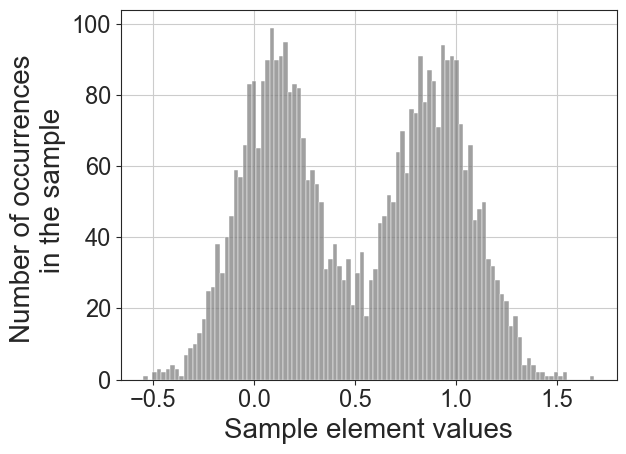

In [23]:
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 

plt.figure()
path = "C:/Users/User/Nextcloud/сценарии python_NEXTCLOUD/Adaptive Segmentation Algo/images/"
print("Histogram of the original distribution")
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.histplot(bimodal_FarSimilarModes['data'], bins = 100, color='grey')  
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_TwoFarGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarGoodModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()


Discriminant function graph


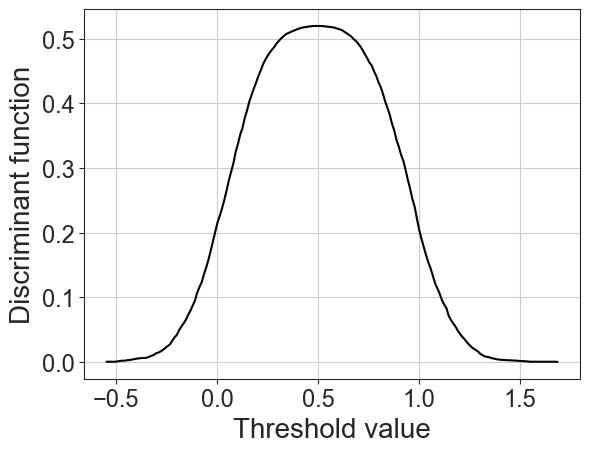

In [24]:
print("Discriminant function graph")
x_min = np.min(bimodal_FarSimilarModes['data'])
x_max = np.max(bimodal_FarSimilarModes['data'])

nu_func,T = discr_method_func (bimodal_FarSimilarModes['data'], bns=200)
x_arr = np.linspace(x_min, x_max, num=len(nu_func))
plt.figure()
plt.xlabel('Threshold value', size= 20)
plt.ylabel('Discriminant function', size= 20)
plt.plot(x_arr,nu_func, color = 'black')
plt.savefig(path+"synt_TwoFarGoodModes_Tresh_Nu.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarGoodModes_Tresh_Nu.png",bbox_inches = 'tight', dpi = 300)
plt.show()


Threshold Value:  0.49032450131118754 Maximum value of the disc.function 0.5200196722252974


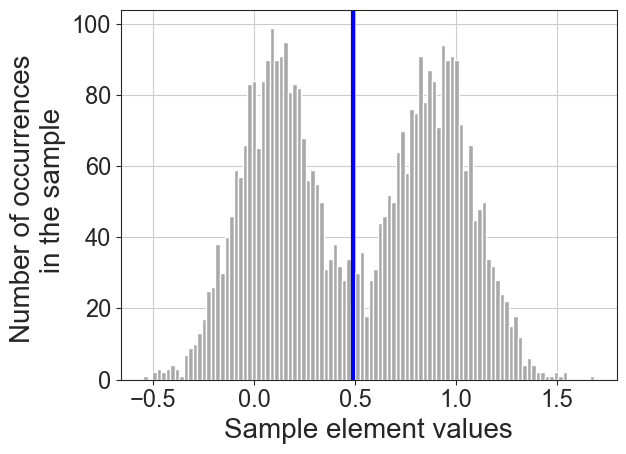

Classification Error 2.525  %


In [25]:

#ищем пороговое значение
max_value = np.max(nu_func)
print("Threshold Value: ",T, "Maximum value of the disc.function", max_value)

#рисуем порог на гистограмме 
plt.figure()
plt.hist(bimodal_FarSimilarModes['data'], bins = 100, color = 'darkgray')
plt.axvline(x=T, linewidth = 3, color ='blue')
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_TwoFarGoodModes_Thresh_Result.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarGoodModes_Thresh_Result.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#разделяем данные по классам 
bimodal_FarSimilarModes['algo_res'] = np.where(bimodal_FarSimilarModes.data > T, 1, 0)

#считаем процент ошибок 
error=np.sum(np.abs(bimodal_FarSimilarModes['algo_res']-bimodal_FarSimilarModes['true_class']))
print("Classification Error", 100*error/(2*size), " %")


JB Statistics for the First class:  SignificanceResult(statistic=16.76475471867843, pvalue=0.00022886520335957546)
JB Statistics for the Second class:  SignificanceResult(statistic=16.424432748560537, pvalue=0.0002713187105835582)
accuracy:  0.97475
precision:  0.9615297115862754
f1:  0.974819247070556


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


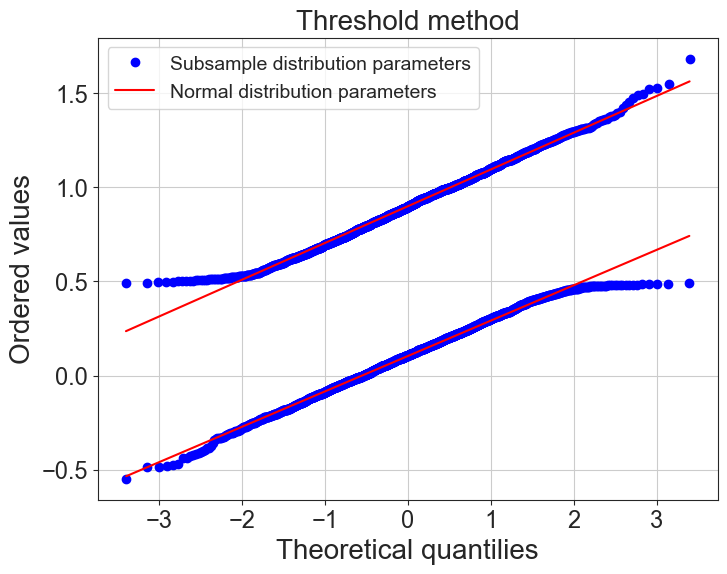

In [26]:
# Считаем статистику Харке-Бера для каждого класса 
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from scipy import stats

cl1 = bimodal_FarSimilarModes['data'].loc[bimodal_FarSimilarModes['algo_res'] == 0].to_numpy()
cl2 = bimodal_FarSimilarModes['data'].loc[bimodal_FarSimilarModes['algo_res'] == 1].to_numpy()
print("JB Statistics for the First class: ", stats.jarque_bera(cl1))
print("JB Statistics for the Second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['algo_res']))
print('precision: ', average_precision_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['algo_res']))
print('f1: ', f1_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['algo_res']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Threshold method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoFarGoodModes_Thresh_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarGoodModes_Thresh_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

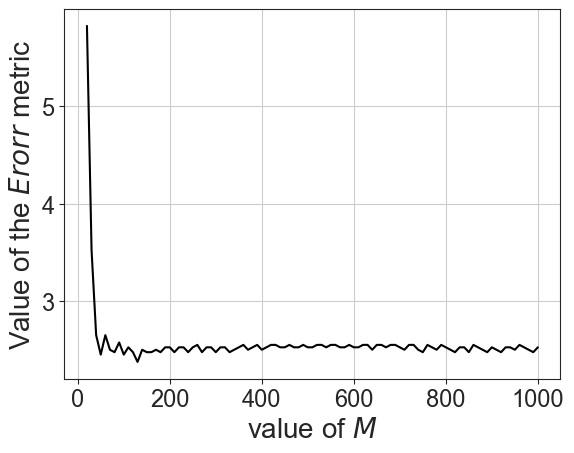

In [27]:
# зависимость ошибки от bins 
bns = np.arange(20, 1010, 10)
bns_error = pd.DataFrame(data = {'bins': bns, 'err': [0]*len(bns)})
bns_error = bns_error.set_index('bins')

for b in bns:
    nu_func,T = discr_method_func (bimodal_FarSimilarModes['data'], bns=b)
    max_value = np.max(nu_func)
    st = 'algo_res'+(str)(b)
    bimodal_FarSimilarModes[st] = np.where(bimodal_FarSimilarModes.data > T, 1, 0)
    
    error=np.sum(np.abs(bimodal_FarSimilarModes[st]-bimodal_FarSimilarModes['true_class']))
    bns_error['err'].loc[b] = 100*error/(2*size)

plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 


bns_error['err'].plot(color='black')
plt.xlabel("value of $\it{M}$", size=20)
plt.ylabel("Value of the $\it{Erorr}$ metric", size=20)
plt.savefig(path+"bins_TwoFarGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"bins_TwoFarGoodModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 1.2. Threshold algo for Weak-separated modes 

Histogram of the original distribution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


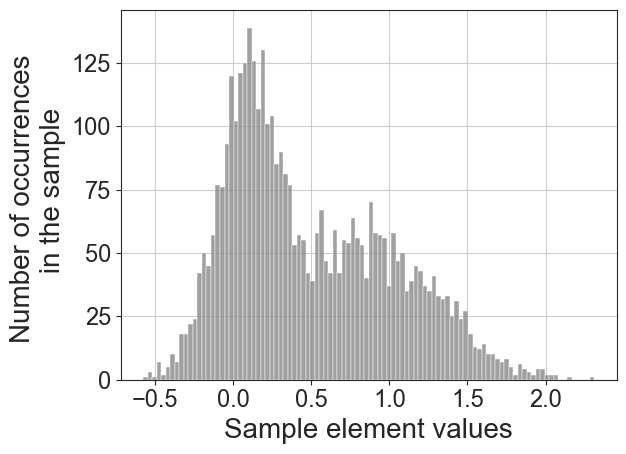

Graph of the discriminant function


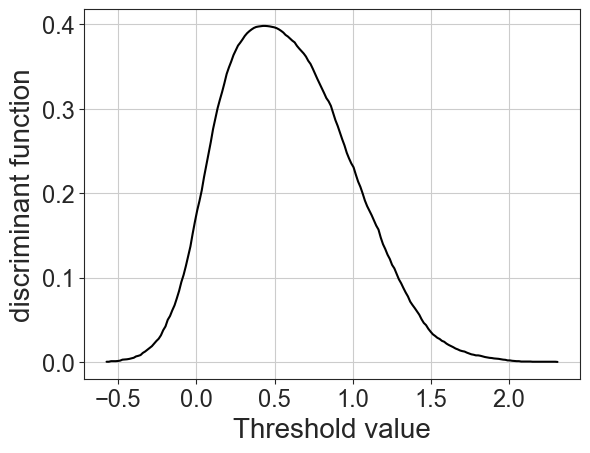

Threshold:  0.4350927504884724 0.39829674319860764


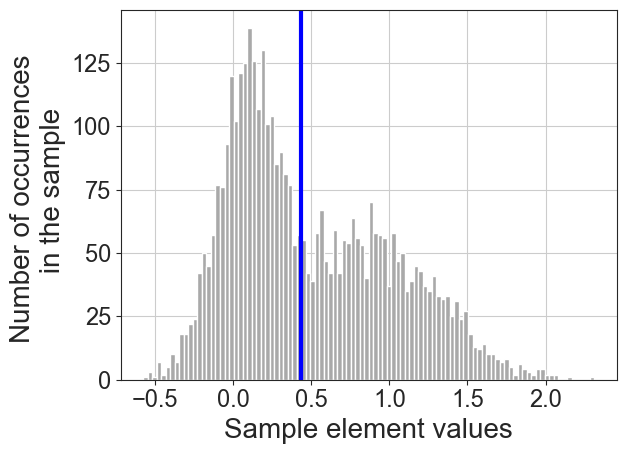

Classification error 8.25  %


In [29]:
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 

print("Histogram of the original distribution")
plt.figure()
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.histplot(bimodal_FarDifferentModes['data'], bins = 100, color='grey')  
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_TwoFarBadModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarBadModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()

print("Graph of the discriminant function")
x_min = np.min(bimodal_FarDifferentModes['data'])
x_max = np.max(bimodal_FarDifferentModes['data'])

nu_func,T = discr_method_func (bimodal_FarDifferentModes['data'], bns=200)
x_arr = np.linspace(x_min, x_max, num=len(nu_func))
plt.figure()
plt.xlabel('Threshold value', size= 20)
plt.ylabel('discriminant function', size= 20)
plt.plot(x_arr,nu_func, color = 'black')
plt.savefig(path+"synt_TwoFarBadModes_Tresh_Nu.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarBadModes_Tresh_Nu.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#find threshold
max_value = np.max(nu_func)
print("Threshold: ",T, max_value)

#depict threshold on the histogramm  
plt.figure()
plt.hist(bimodal_FarDifferentModes['data'], bins = 100, color = 'darkgray')
plt.axvline(x=T, color ='blue',lw = 3)
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_TwoFarBadModes_Thresh_Result.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarBadModes_Thresh_Result.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#divide data to classes
bimodal_FarDifferentModes['algo_res'] = np.where(bimodal_FarDifferentModes.data > T, 1, 0)

#calculate error 
error=np.sum(np.abs(bimodal_FarDifferentModes['algo_res']-bimodal_FarDifferentModes['true_class']))
print("Classification error", 100*error/(2*size), " %")


JB Statistics for the First class:  SignificanceResult(statistic=61.679425395896686, pvalue=4.0409451149933106e-14)
JB Statistics for the Second class:  SignificanceResult(statistic=99.6723179473381, pvalue=2.2721194452265367e-22)
accuracy:  0.9175
precision:  0.8998752741228071
f1:  0.9137029288702929


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


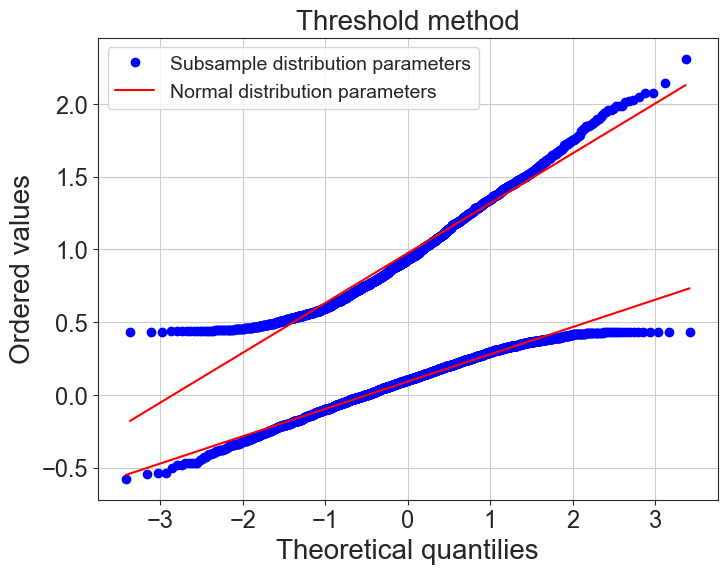

In [30]:
# calculate the Jarque-Bera statistics for each class 
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from scipy import stats

cl1 = bimodal_FarDifferentModes['data'].loc[bimodal_FarDifferentModes['algo_res'] == 0].to_numpy()
cl2 = bimodal_FarDifferentModes['data'].loc[bimodal_FarDifferentModes['algo_res'] == 1].to_numpy()
print("JB Statistics for the First class: ", stats.jarque_bera(cl1))
print("JB Statistics for the Second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['algo_res']))
print('precision: ', average_precision_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['algo_res']))
print('f1: ', f1_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['algo_res']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Threshold method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoFarBadModes_Thresh_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarBadModes_Thresh_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

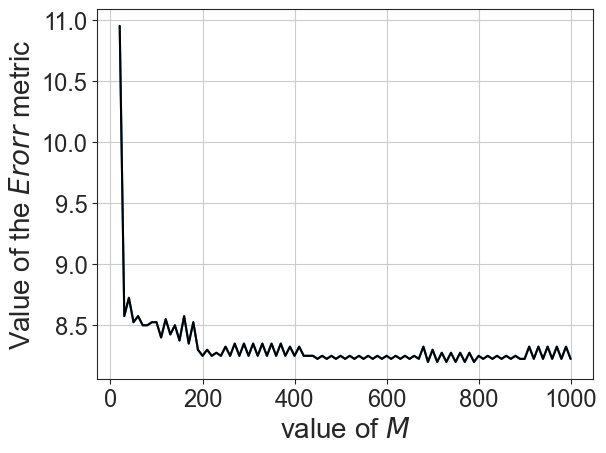

In [31]:
# зависимость ошибки от bins 
bns = np.arange(20, 1010, 10)
bns_error = pd.DataFrame(data = {'bins': bns, 'err': [0]*len(bns)})
bns_error = bns_error.set_index('bins')

for b in bns:
    nu_func,T = discr_method_func (bimodal_FarDifferentModes['data'], bns=b)
    max_value = np.max(nu_func)
    st = 'algo_res'+(str)(b)
    bimodal_FarDifferentModes[st] = np.where(bimodal_FarDifferentModes.data > T, 1, 0)
    
    error=np.sum(np.abs(bimodal_FarDifferentModes[st]-bimodal_FarDifferentModes['true_class']))
    bns_error['err'].loc[b] = 100*error/(2*size)

bns_error['err'].plot()
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 

bns_error['err'].plot(color='black')
plt.xlabel("value of $\it{M}$", size=20)
plt.ylabel("Value of the $\it{Erorr}$ metric", size=20)
plt.savefig(path+"bins_TwoFarBadModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"bins_TwoFarBadModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 1.3 Threshold algo for fuzzy modes

Histogram of the original distribution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


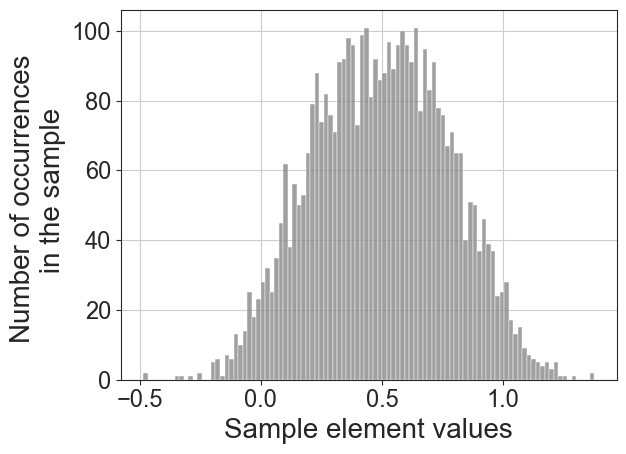

Graph of the discriminant function


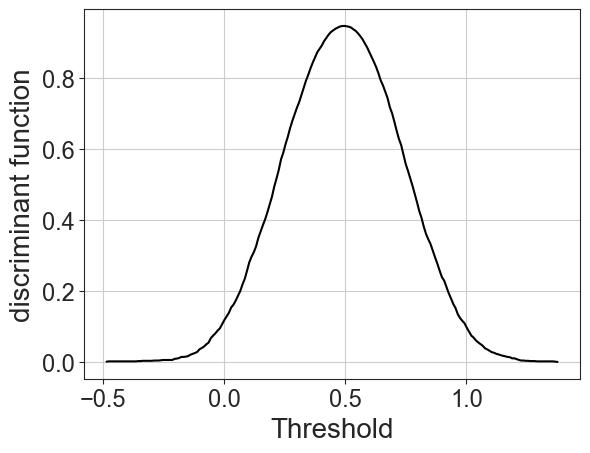

Threshold value:  0.49203764143164047 0.9478137626070213


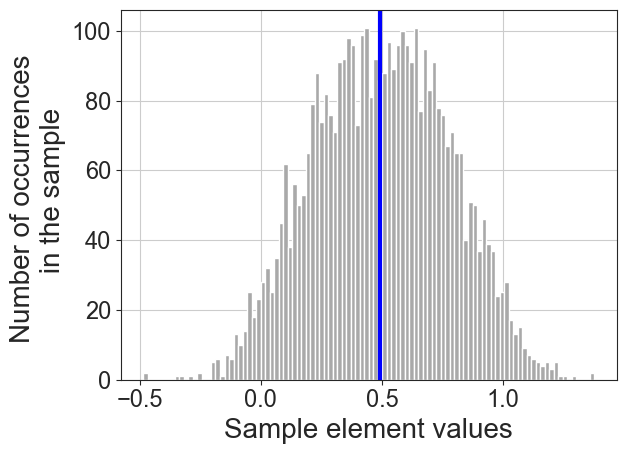

Classification error 15.725  %


In [33]:
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 

print("Histogram of the original distribution")
plt.figure()
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.histplot(bimodal_NearSimilarModes['data'], bins = 100, color='grey')  
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_TwoNearGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoNearGoodModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()

print("Graph of the discriminant function")
x_min = np.min(bimodal_NearSimilarModes['data'])
x_max = np.max(bimodal_NearSimilarModes['data'])

nu_func,T = discr_method_func (bimodal_NearSimilarModes['data'], bns=200)
x_arr = np.linspace(x_min, x_max, num=len(nu_func))
plt.figure()
plt.xlabel('Threshold', size= 20)
plt.ylabel('discriminant function', size= 20)
plt.plot(x_arr,nu_func, color = 'black')
plt.savefig(path+"synt_TwoNearGoodModes_Tresh_Nu.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoNearGoodModes_Tresh_Nu.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#find threshold value
max_value = np.max(nu_func)
print("Threshold value: ",T, max_value)

#depict threshold in histogram 
plt.figure()
plt.hist(bimodal_NearSimilarModes['data'], bins = 100, color = 'darkgray')
plt.axvline(x=T, color ='blue', lw = 3)
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_TwoNearGoodModes_Thresh_Result.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoNearGoodModes_Thresh_Result.png",bbox_inches = 'tight', dpi = 300)
plt.show()
#divide data into classes
bimodal_NearSimilarModes['algo_res'] = np.where(bimodal_NearSimilarModes.data > T, 1, 0)

#calculate error 
error=np.sum(np.abs(bimodal_NearSimilarModes['algo_res']-bimodal_NearSimilarModes['true_class']))
print("Classification error", 100*error/(2*size), " %")


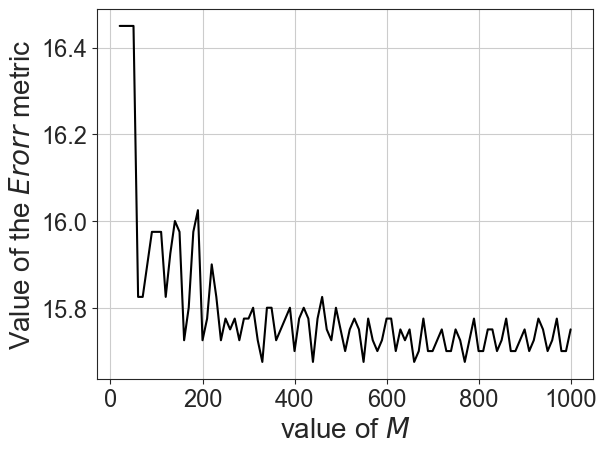

In [34]:
# зависимость ошибки от bins 
bns = np.arange(20, 1010, 10)
bns_error = pd.DataFrame(data = {'bins': bns, 'err': [0]*len(bns)})
bns_error = bns_error.set_index('bins')

for b in bns:
    nu_func,T = discr_method_func (bimodal_NearSimilarModes['data'], bns=b)
    max_value = np.max(nu_func)
    st = 'algo_res'+(str)(b)
    bimodal_NearSimilarModes[st] = np.where(bimodal_NearSimilarModes.data > T, 1, 0)
    
    error=np.sum(np.abs(bimodal_NearSimilarModes[st]-bimodal_NearSimilarModes['true_class']))
    bns_error['err'].loc[b] = 100*error/(2*size)

plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 

bns_error['err'].plot(color='black')
plt.xlabel("value of $\it{M}$", size=20)
plt.ylabel("Value of the $\it{Erorr}$ metric", size=20)
plt.savefig(path+"bins_TwoNearGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"bins_TwoNearGoodModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()

JB statistic fot the first class:  SignificanceResult(statistic=184.1741359089078, pvalue=1.016469923451781e-40)
JB statistic fot the second class:  SignificanceResult(statistic=175.87911717470726, pvalue=6.431836034571011e-39)
accuracy:  0.84275
precision:  0.7867187039764358
f1:  0.8441912311122121


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


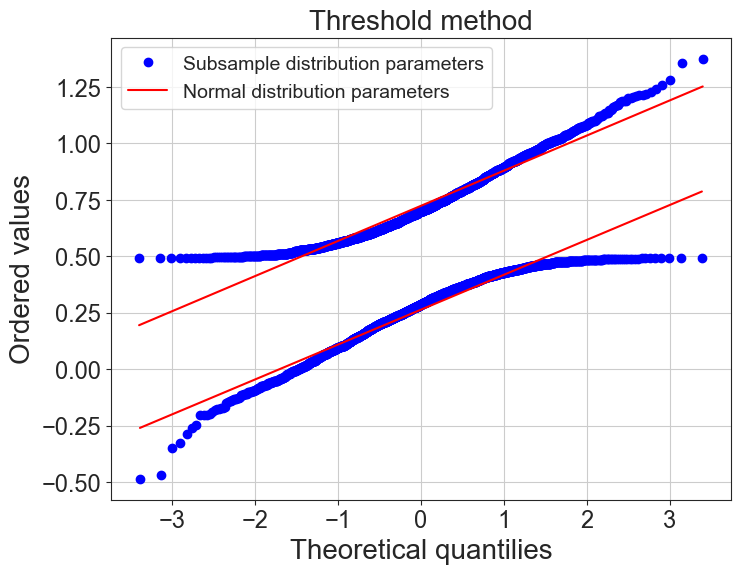

In [35]:
cl1 = bimodal_NearSimilarModes['data'].loc[bimodal_NearSimilarModes['algo_res'] == 0].to_numpy()
cl2 = bimodal_NearSimilarModes['data'].loc[bimodal_NearSimilarModes['algo_res'] == 1].to_numpy()
print("JB statistic fot the first class: ", stats.jarque_bera(cl1))
print("JB statistic fot the second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['algo_res']))
print('precision: ', average_precision_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['algo_res']))
print('f1: ', f1_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['algo_res']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Threshold method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoNearGoodModes_Thresh_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoNearGoodModes_Thresh_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 1.4. Treshold algo for Temperature data


Histogram of the original distribution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


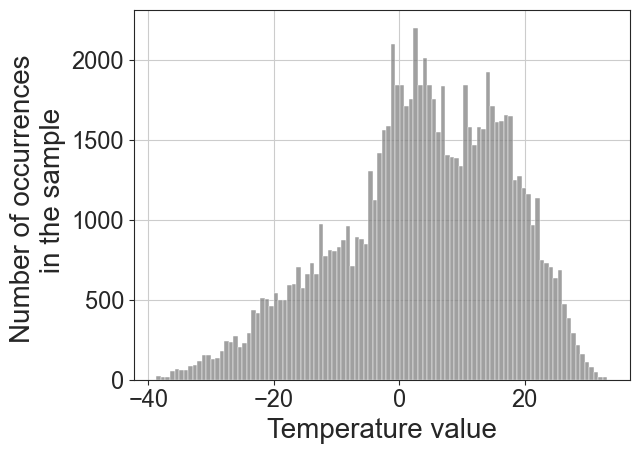

Histogram of the left part


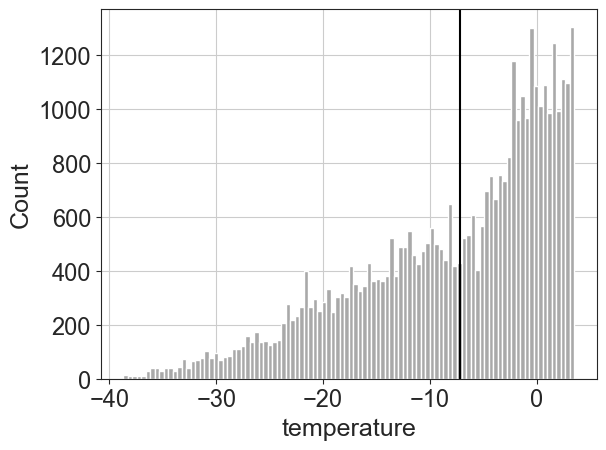

Histogram of the right part


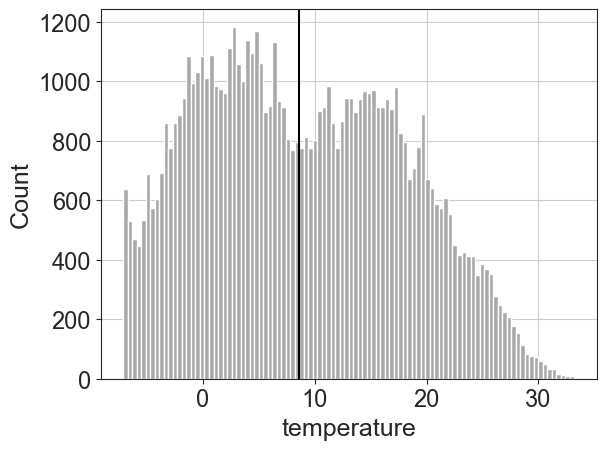

Histogram of the left part


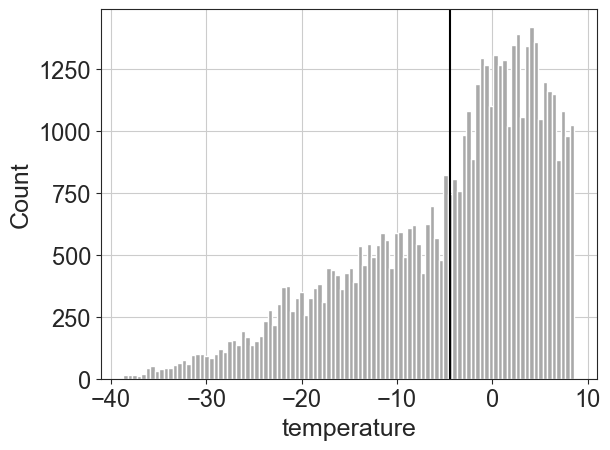

Thresholds:  -4.407499999999999 8.617
General histogram with thresholds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


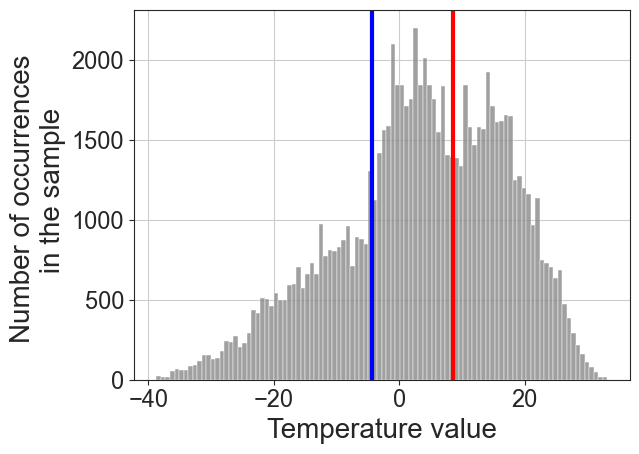

In [37]:
sens = 't.m_vet'
df = pd.DataFrame()
df[sens] = Rough_DATA_NotAnomalyInPairs[sens]
d = df[sens].dropna().to_numpy()

bns = 400 
print("Histogram of the original distribution")
plt.figure()
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.histplot(d, bins = 100, color='grey')  
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17)
plt.xlabel('Temperature value', size= 20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"Temperature_original.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"Temperature_original.png",bbox_inches = 'tight', dpi = 300)
plt.show()

nu_func,T = discr_method_func (d, bns=bns)
max_value = np.max(nu_func)

d_left = d[d<=T]
print("Histogram of the left part")
nu_func,T_left = discr_method_func (d_left, bns=bns)
max_value_left = np.max(nu_func)
plt.figure()
plt.hist(d_left, bins = 100, color = 'darkgray')
plt.xlabel('temperature', size= 18)
plt.ylabel('Count', size= 18)
plt.axvline(x=T_left, color ='black')
plt.show()

d_right = d[d>T_left]
print("Histogram of the right part")
nu_func,T_right = discr_method_func (d_right, bns=bns)
max_value_right = np.max(nu_func)
plt.figure()
plt.hist(d_right, bins = 100, color = 'darkgray')
plt.xlabel('temperature', size= 18)
plt.ylabel('Count', size= 18)
plt.axvline(x=T_right, color ='black')
plt.show()

d_left = d[d<=T_right]
print("Histogram of the left part")
nu_func,T_left = discr_method_func (d_left, bns=bns)
max_value_left = np.max(nu_func)
plt.figure()
plt.hist(d_left, bins = 100, color = 'darkgray')
plt.xlabel('temperature', size= 18)
plt.ylabel('Count', size= 18)
plt.axvline(x=T_left, color ='black')
plt.show()

print("Thresholds: ", T_left, T_right)
print("General histogram with thresholds")
plt.figure()
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.histplot(d, bins = 100, color='grey')  
plt.xlabel('Temperature value', size= 20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.axvline(x=T_left, color ='blue', lw = 3 )
plt.axvline(x=T_right, color ='red', lw = 3 )
plt.savefig(path+"Temperature_thresh.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"Temperature_thresh.png",bbox_inches = 'tight', dpi = 300)
plt.show()



JB statistic for d_left:  SignificanceResult(statistic=1822.7696324518654, pvalue=0.0)
JB statistic for d_middle:  SignificanceResult(statistic=1537.2841444679245, pvalue=0.0)
JB statistic for d_right:  SignificanceResult(statistic=1674.4338207049796, pvalue=0.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


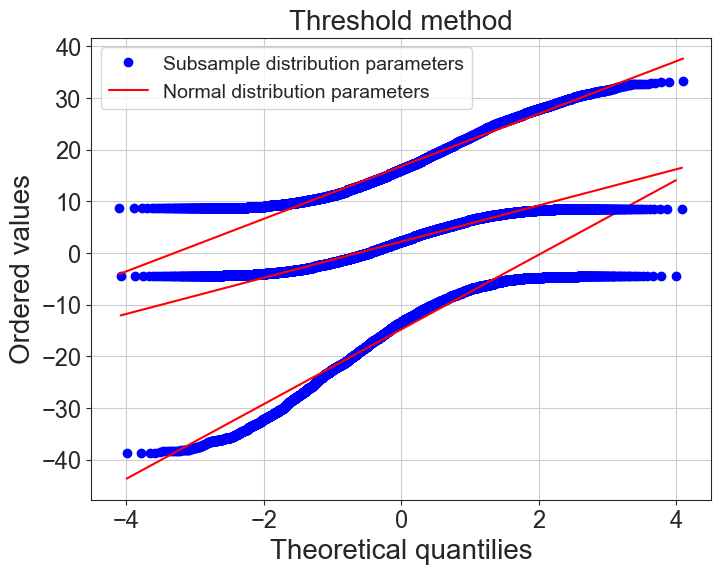

In [38]:
d_left = d[d<=T_left]
d_middle = d[(d>T_left) & (d < T_right)]
d_right = d[d>=T_right]
print("JB statistic for d_left: ", stats.jarque_bera(d_left))
print("JB statistic for d_middle: ", stats.jarque_bera(d_middle))
print("JB statistic for d_right: ", stats.jarque_bera(d_right))

plt.figure(figsize=(8, 6))

stats.probplot(d_left, dist="norm", plot=plt)
stats.probplot(d_middle, dist="norm", plot=plt)
stats.probplot(d_right, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Threshold method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"Temperature_Thresh_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"Temperature_Thresh_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

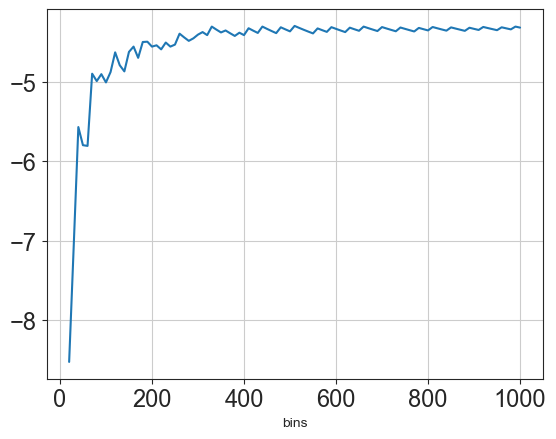

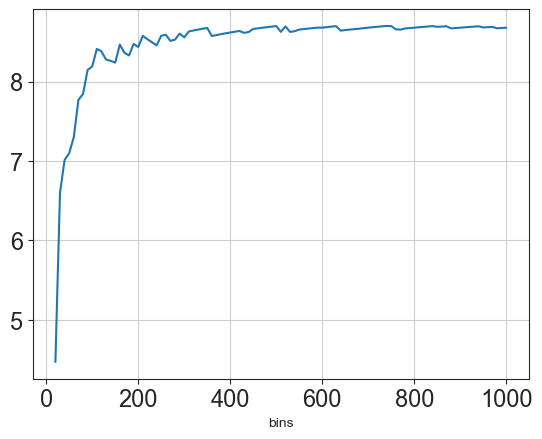

In [39]:
d = df[sens].dropna().to_numpy()
bns = np.arange(20, 1010, 10)
bns_thr = pd.DataFrame(data = {'bins': bns, 'Left_T': [0]*len(bns), 'Right_T': [0]*len(bns)})
bns_thr = bns_thr.set_index('bins')

for b in bns:
    nu_func,T = discr_method_func (d, bns=b)
    max_value = np.max(nu_func)

    d_left = d[d<=T]
    nu_func,T_left = discr_method_func (d_left, bns=b)
    max_value_left = np.max(nu_func)

    d_right = d[d>T_left]
    nu_func,T_right = discr_method_func (d_right, bns=b)
    max_value_right = np.max(nu_func)

    d_left = d[d<=T_right]
    nu_func,T_left = discr_method_func (d_left, bns=b)
    max_value_left = np.max(nu_func)
    
    bns_thr['Left_T'].loc[b] = T_left
    bns_thr['Right_T'].loc[b] = T_right
    
    
bns_thr['Left_T'].plot()
plt.show()
bns_thr['Right_T'].plot()
plt.show()

-4.312899999999999 8.677999999999999


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


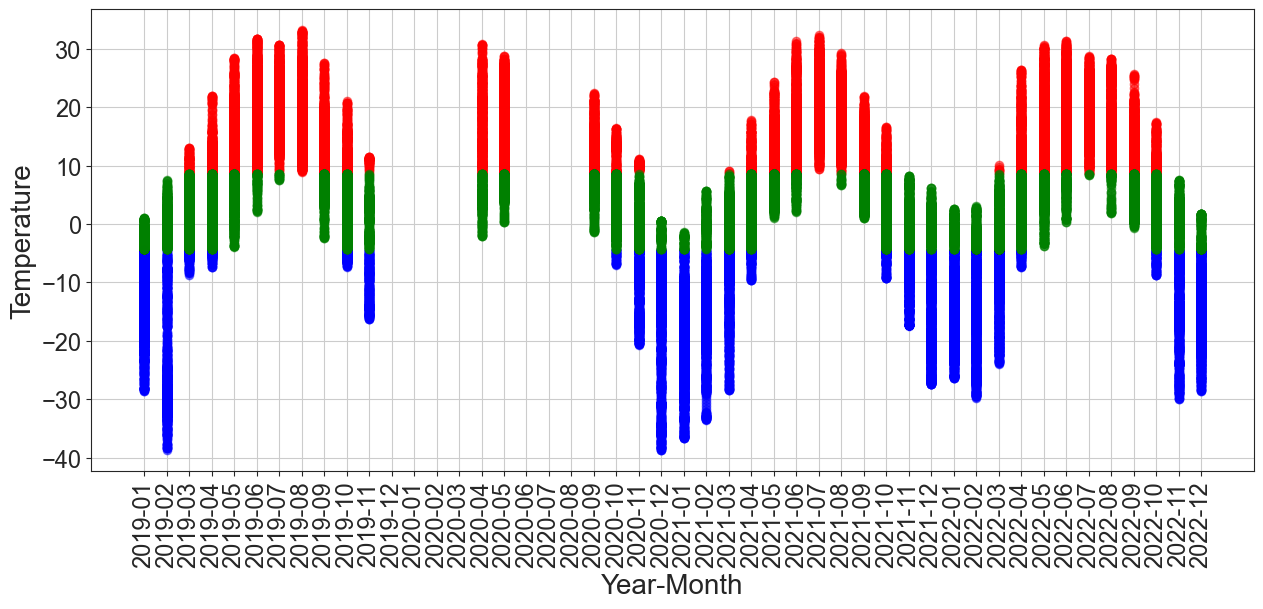

In [40]:
df = df.reset_index()
x = df['DateTime'].to_numpy()
a = [elem[:7] for elem in x]
x = a.copy()
y = df[sens].to_numpy()
print(T_left,T_right)
y_masked0 = np.ma.masked_where(y > T_left, y)
y_masked1 = np.ma.masked_where(y < T_right, y)
y_masked2 = np.ma.masked_outside(y, T_left, T_right)


plt.figure(figsize=(15,6))
plt.scatter(x, y_masked0,  c = 'blue',alpha=0.5)
plt.scatter(x, y_masked1,  c = 'red',alpha=0.5)
plt.scatter(x, y_masked2, c = 'green',alpha=0.5)
#plt.xticks(np.arange(0,365*4+h,step=h), rotation = 90)
plt.xticks(rotation = 90)
plt.xlabel("Year-Month",size=20)
plt.ylabel("Temperature",size=20)
plt.savefig(path+"Temp_Month_Tresh.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"Temp_Month_Tresh.png",bbox_inches = 'tight', dpi = 300)
plt.show()
df = df.set_index('DateTime')

## 1.5 Treshold algo for PM2.5

Histogram of the original distribution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


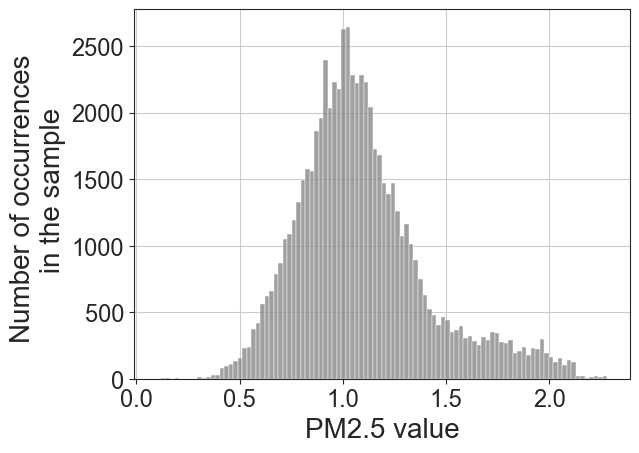

Threshold:  1.0475249771884447
Histogram with threshold


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


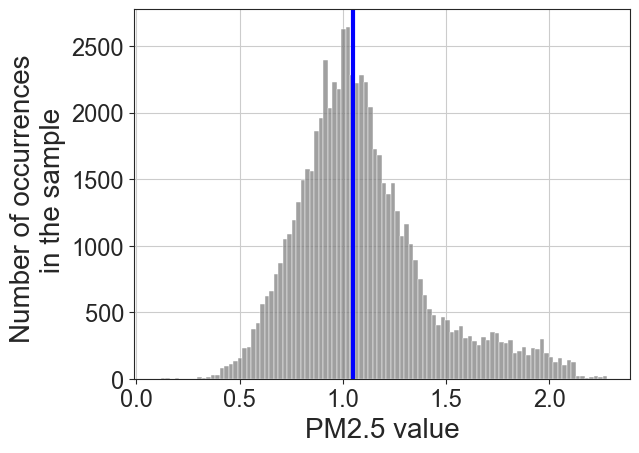

In [42]:
sens = 'pm25.m_svr'
df = pd.DataFrame()
df[sens] = Rough_DATA_NotAnomalyInPairs[sens]
df['roll_72'] = df[sens].rolling(72, min_periods=1).mean()
df['log10_pm'] = np.log10(df['roll_72']) 
df = df.dropna()
d = df['log10_pm'].to_numpy()

bns = 400 
print("Histogram of the original distribution")
plt.figure()
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.histplot(d, bins = 100, color='grey')  
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17)
plt.xlabel('PM2.5 value', size= 20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"PM_original.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"PM_original.png",bbox_inches = 'tight', dpi = 300)
plt.show()

nu_func,T = discr_method_func (d, bns=bns)
max_value = np.max(nu_func)

print("Threshold: ", T)
print("Histogram with threshold")
plt.figure()
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.histplot(d, bins = 100, color='grey')  
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.xlabel('PM2.5 value', size= 20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.axvline(x=T, color ='blue', lw = 3 )
plt.savefig(path+"PM_thresh.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"PM_thresh.png",bbox_inches = 'tight', dpi = 300)
plt.show()


JB statistic for d_left:  SignificanceResult(statistic=4190.113648373971, pvalue=0.0)
JB statistic for d_right:  SignificanceResult(statistic=9069.26905515036, pvalue=0.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


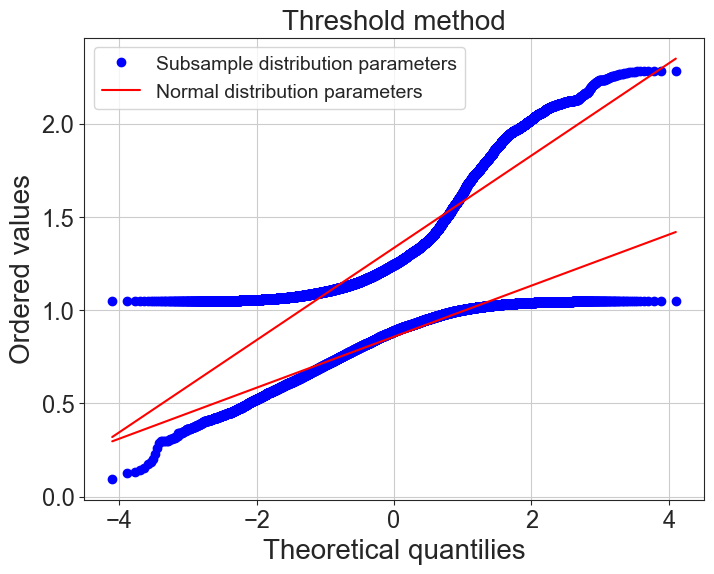

In [43]:
d_left = d[d<=T]
d_right = d[d>T]
print("JB statistic for d_left: ", stats.jarque_bera(d_left))
print("JB statistic for d_right: ", stats.jarque_bera(d_right))

plt.figure(figsize=(8, 6))

stats.probplot(d_left, dist="norm", plot=plt)
stats.probplot(d_right, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Threshold method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"PM_Thresh_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"PM_Thresh_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 1.6. Threshold ago for Non-stationary TS

Histogram of the original distribution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


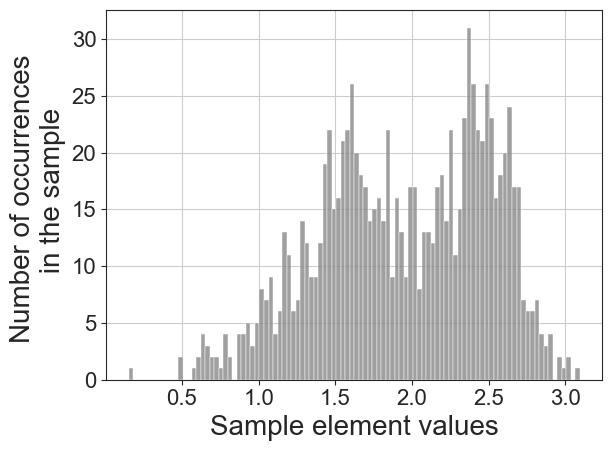

Graph of the discriminant function


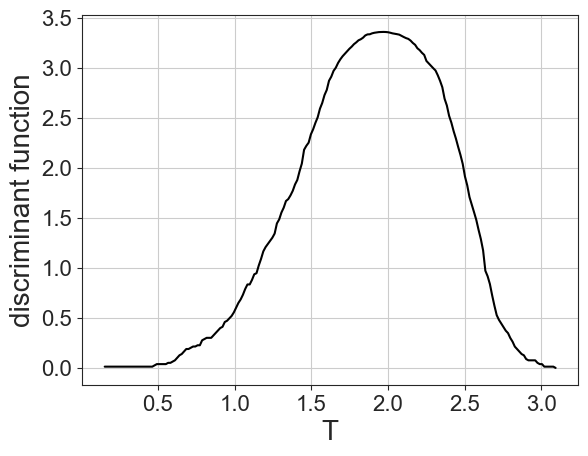

Threshold:  1.9606704057748132 3.35799619404319


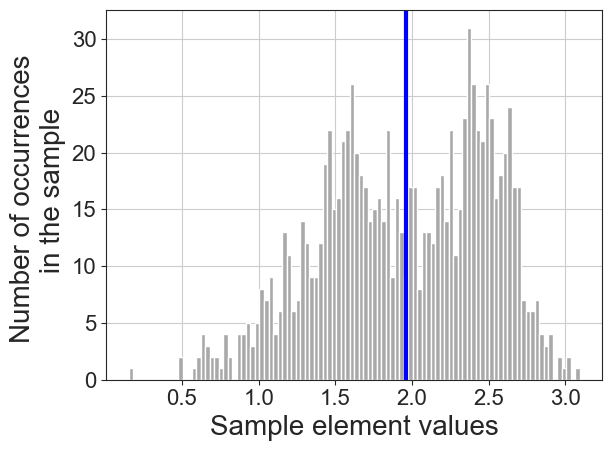

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


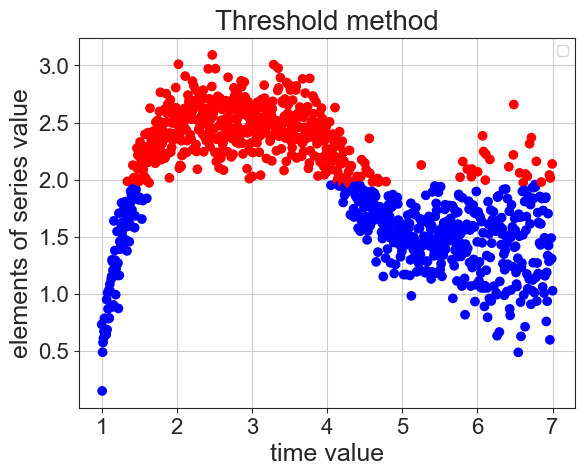

In [45]:
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

print("Histogram of the original distribution")
plt.figure()
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.histplot(MotivationData['Y'], bins = 100, color='grey')  
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_Motivation.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_Motivation.png",bbox_inches = 'tight', dpi = 300)
plt.show()

print("Graph of the discriminant function")
x_min = np.min(MotivationData['Y'])
x_max = np.max(MotivationData['Y'])

nu_func,T = discr_method_func (MotivationData['Y'], bns=200)
x_arr = np.linspace(x_min, x_max, num=len(nu_func))
plt.figure()
plt.xlabel('T', size= 20)
plt.ylabel('discriminant function', size= 20)
plt.plot(x_arr,nu_func, color = 'black')
plt.savefig(path+"synt_Motivation_Tresh_Nu.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_Motivation_Tresh_Nu.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#find threshold value
max_value = np.max(nu_func)
print("Threshold: ",T, max_value)

#depict threshold in histogram
plt.figure()
plt.hist(MotivationData['Y'], bins = 100, color = 'darkgray')
plt.axvline(x=T, color ='blue', lw = 3)
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_Motivation_Thresh_Result.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_Motivation_Thresh_Result.png",bbox_inches = 'tight', dpi = 300)
plt.show()
#divide data into classes 
MotivationData['algo_res'] = np.where(MotivationData.Y > T, 1, 0)


colors = np.where(MotivationData["algo_res"]==1,'red','blue')
#plt.figure(figsize=(10,5))
plt.figure()
plt.scatter(x=MotivationData['X'], y = MotivationData['Y'], c = colors)
plt.xlabel("time value",size=18)
plt.ylabel("elements of series value",size=18)
plt.legend()
plt.title('Threshold method',size=20)
plt.grid(True)
plt.savefig(path+"Motive_TreshSegmRes.eps",bbox_inches = 'tight', dpi = 300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


JB Statistics for the First class:  SignificanceResult(statistic=61.42793137515845, pvalue=4.582412537432759e-14)
JB Statistics for the Second class:  SignificanceResult(statistic=7.457710148234914, pvalue=0.024020321587025214)


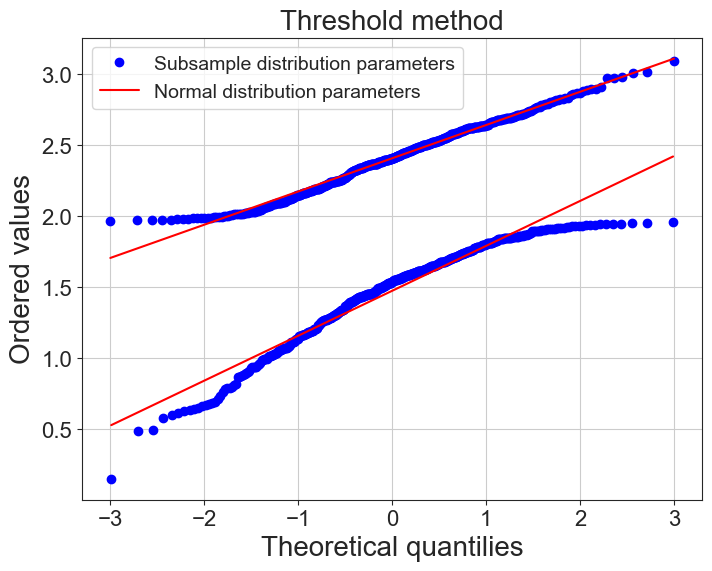

In [46]:
cl1 = MotivationData['Y'].loc[MotivationData['algo_res'] == 0].to_numpy()
cl2 = MotivationData['Y'].loc[MotivationData['algo_res'] == 1].to_numpy()
print("JB Statistics for the First class: ", stats.jarque_bera(cl1))
print("JB Statistics for the Second class: ", stats.jarque_bera(cl2))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Threshold method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_Motivation_Thresh_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_Motivation_Thresh_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

# 2. Implementation of Adaptive TS segmentation method

In [48]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import jarque_bera
import numpy as np
import pandas as pd
import math
from sklearn.cluster import KMeans

def findIndexOfFirstNaN (mas):
    NanContain=False
    NanFirstIndex = -1
    for i in range(len(mas)):
        if(math.isnan(mas[i])):
            NanContain = True
            NanFirstIndex = i
            break
    return (NanContain, NanFirstIndex)

def findIndexOfFirstNotNaN (mas):
    NotNanContain=False
    NotNanFirstIndex = -1
    for i in range(len(mas)):
        if(math.isnan(mas[i])==False):
            NotNanContain = True
            NotNanFirstIndex = i
            break
    return (NotNanContain,NotNanFirstIndex)

def determineNaN_borders(mas):
    
    OnlyNans = False
    NotNanContain, FirstNotNanIndex = findIndexOfFirstNotNaN(mas)
    if (NotNanContain):
        NanContain, FirstNanIndex = findIndexOfFirstNaN(mas[FirstNotNanIndex:])
    
        if (NanContain):
            borders = (FirstNotNanIndex,FirstNotNanIndex+FirstNanIndex-1)
        else:
            borders = (FirstNotNanIndex,len(mas))
    else:
        OnlyNans = True
        borders = (-1,-1)
    
    return (OnlyNans,borders)


def FoundUniformSubsec(mas, brd=(0,1), epsilon=2):
    borders = brd
    dist= (int)(0.5*(borders[1]-borders[0]))
    borders = (borders[0],borders[0]+dist)
    true_max = true_min = true_av = true_med = true_std = true_size = true_kurtosis = true_IQR = true_skew = 0
    def interior(mas, dist=1, epsilon=2):
            
            nonlocal borders
            nonlocal true_max, true_min, true_av, true_med, true_std, true_size, true_kurtosis, true_IQR, true_skew
            
            if (dist==0):
                 true_med = true_max = true_min = true_av = mas[borders[0]]
                 true_size = 1
                 true_kurtosis = 0
                 true_skew = 0
                 q75, q25 = np.percentile(mas[borders[0]:borders[1]+1], [75 ,25])
                 true_IQR = q75 - q25
                 borders = (borders[0],borders[0]+1)
                 return
            
            else:
                max_left = max(mas[borders[0]:borders[1]])
                min_left = min(mas[borders[0]:borders[1]])
                if (abs(max_left - min_left)<=epsilon):
                    if (dist>=1):
                        for i in range (dist):
                            max_add = max(mas[borders[0]:borders[1]+dist-i])
                            min_add = min(mas[borders[0]:borders[1]+dist-i])
                            if (abs(max_add - min_add)<=epsilon):
                                borders=(borders[0],borders[1]+dist-i)
                                break
                        true_max = max(mas[borders[0]:borders[1]])
                        true_min = min(mas[borders[0]:borders[1]])
                        true_av = np.mean(mas[borders[0]:borders[1]])
                        true_med = np.median(mas[borders[0]:borders[1]])
                        true_size = borders[1]-borders[0]
                        true_std = np.std(mas[borders[0]:borders[1]])
                        if (true_av==mas[borders[0]] and true_av==mas[borders[1]-1]):
                            true_kurtosis = 0
                            true_skew = 0
                        else:
                            true_kurtosis = kurtosis(mas[borders[0]:borders[1]])
                            true_skew = skew(mas[borders[0]:borders[1]])
                        
                        q75, q25 = np.percentile(mas[borders[0]:borders[1]], [75 ,25])
                        true_IQR = q75 - q25
                        #print("true borders: ", borders)
                else:
                    borders = (borders[0],borders[0]+dist)
                    dist =(int)(0.5*dist)
                    interior(mas, dist = dist, epsilon = epsilon)
            return    
    interior(mas, dist = dist, epsilon = epsilon)
    return borders, true_max, true_min, true_av, true_med, true_std, true_size, true_kurtosis, true_IQR, true_skew

def FoundNotNanSubsec(mas, epsilon=2):
    onlyNan, borders = determineNaN_borders(mas)
    return borders
    
def divideClasses(mas,epsilon = 2):
    NotNanSec_df = pd.DataFrame(data = {'start': [0], 'fin': [0]})
    start_prev = start = 0
    finish = len(mas)
    i=0 
    while (start<=finish):
        #print('!!!!',start,finish,'!!!!')
        brd = FoundNotNanSubsec(mas[start:], epsilon=epsilon)
        NotNanSec_df.loc[i] = [start+brd[0], start +brd[1]]
       # print(start,start +(brd[1]-brd[0]))
        i = i+1
        start = start +brd[1] + 1
    NotNanSec_df['fin'].loc[NotNanSec_df.shape[0]-1]=NotNanSec_df['fin'].loc[NotNanSec_df.shape[0]-1]-1
    
    Result_df = pd.DataFrame(data = {'start': [0], 'fin': [0], 'min': [0], 'max': [0], 'average': [0], 
                                     'median': [0], 'std':[0], 'size': [0], 'kurtosis': [0], 'IQR': [0], 'skew': [0]})
    
    j=0
    for i in range (NotNanSec_df.shape[0]):
        start = NotNanSec_df['start'].iloc[i]
        finish = NotNanSec_df['fin'].iloc[i]
        
        while (start<=finish):
            #print("initial start : ", start, "initial finish: ", finish)
            brd, true_max, true_min, true_av, true_med, true_std, true_size, true_kurtosis, true_IQR, true_skew = FoundUniformSubsec(mas, brd=(start,finish), epsilon=epsilon)
            #print(brd[0], brd[1], true_min, true_max,true_av, start, finish)
            start = brd[1]
            Result_df.loc[j] = [brd[0], brd[1], true_min, true_max, true_av, true_med, true_std, true_size, true_kurtosis, true_IQR, true_skew]
            j=j+1
    
    
    return  Result_df
    
def get_jenks_breaks(data_list, number_class):
    #print('before sort')
    data_list.sort()
    #print('after sort')
    mat1 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat1.append(temp)
    mat2 = []
   # print('stage1')
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat2.append(temp)
   # print('stage2')
    for i in range(1, number_class + 1):
        mat1[1][i] = 1
        mat2[1][i] = 0
        for j in range(2, len(data_list) + 1):
            mat2[j][i] = float('inf')
    v = 0.0
   # print('stage3')
    for l in range(2, len(data_list) + 1):
       # print(l)
        s1 = 0.0
        s2 = 0.0
        w = 0.0
        for m in range(1, l + 1):
            i3 = l - m + 1
            val = float(data_list[i3 - 1])
            s2 += val * val
            s1 += val
            w += 1
            v = s2 - (s1 * s1) / w
            i4 = i3 - 1
            if i4 != 0:
                for j in range(2, number_class + 1):
                    if mat2[l][j] >= (v + mat2[i4][j - 1]):
                        mat1[l][j] = i3
                        mat2[l][j] = v + mat2[i4][j - 1]
        mat1[l][1] = 1
        mat2[l][1] = v
    k = len(data_list)
    kclass = []
  #  print('stage4')
    for i in range(number_class + 1):
        kclass.append(min(data_list))
    kclass[number_class] = float(data_list[len(data_list) - 1])
    count_num = number_class
   # print('stage5')
    while count_num >= 2:  # print "rank = " + str(mat1[k][count_num])
        idx = int((mat1[k][count_num]) - 2)
        # print "val = " + str(data_list[idx])
        kclass[count_num - 1] = data_list[idx]
        k = int((mat1[k][count_num] - 1))
        count_num -= 1
   # print('stage6')
    return kclass


    


def fill_classes(df,stat,breaks):
    
    for i in range(1,len(breaks)):
        if (df[stat] <= breaks[i]) & (df[stat] >= breaks[i-1]):
            return i-1
    
    
def segmentationMultimodalDistr (data,bins = 10, classes = 2, stat = 'average'):
  
    h = (np.max(np.abs(data)) - np.min(np.abs(data)))/bins
    T_mas = np.linspace(np.min(np.abs(data))+h,np.max(np.abs(data)),bins-1)
    JB_mas_max = []
    df = pd.DataFrame()
    df['data'] =data
        
    for t in T_mas:
 #       print(t)
        JB_mas = []
        AdapRes = divideClasses(df['data'], epsilon = t)
        if (stat=='average'):
            av = AdapRes['average'].to_numpy().copy()
        elif (stat=='median'):
            av = AdapRes['median'].to_numpy().copy()
        else: 
            print("Wrong statistical charactistic!!!")
            return -1
        
#        print("start_Jenks")
        breaks = get_jenks_breaks(av, classes)
#        print("finish_Jenks")
        AdapRes['Jenks_class'] = AdapRes.apply(fill_classes, axis = 1, args =(stat, breaks))
        
        df["Adap_Jenks_Class"] = -100
        
        for i in range(AdapRes.shape[0]):
            df["Adap_Jenks_Class"].iloc[(int)(AdapRes['start'].iloc[i]):(int)(AdapRes['fin'].iloc[i])] = AdapRes['Jenks_class'].iloc[i]

        JB_max = 0
        
        for i in range(classes):
            df_sub = df.loc[df["Adap_Jenks_Class"] == i]
            if (df_sub.shape[0]!=0):
                JB_mas.append(jarque_bera(df_sub['data']).statistic)
        
        JB_mas_max.append(np.max(JB_mas))
    
    jb_min = JB_mas_max[0]
    for jb in JB_mas_max:
        if (np.isnan(jb)==False) and (jb<jb_min):
            jb_min = jb
            
        
    T = T_mas[JB_mas_max.index(jb_min)]
        
    AdapRes = divideClasses(df['data'], epsilon = T)
    av = AdapRes[stat].to_numpy().copy()
        
    breaks = get_jenks_breaks(av, classes)
    AdapRes['Jenks_class'] = AdapRes.apply(fill_classes, axis = 1, args =(stat, breaks))
        
    for i in range(AdapRes.shape[0]):
        df["Adap_Jenks_Class"].iloc[(int)(AdapRes['start'].iloc[i]):(int)(AdapRes['fin'].iloc[i])] = AdapRes['Jenks_class'].iloc[i]
     
    return [T, T_mas, JB_mas_max, df]


def segmentationMultimodalDistrOneTresh (data,T, classes = 2, stat = 'average'):
  
    T_mas = [T]
    JB_mas_max = []
    df = pd.DataFrame()
    df['data'] =data
        
    for t in T_mas:
 #       print(t)
        JB_mas = []
        AdapRes = divideClasses(df['data'], epsilon = t)
        if (stat=='average'):
            av = AdapRes['average'].to_numpy().copy()
        elif (stat=='median'):
            av = AdapRes['median'].to_numpy().copy()
        else: 
            print("Wrong statistical charactistic!!!")
            return -1
        
#        print("start_Jenks")
        breaks = get_jenks_breaks(av, classes)
#        print("finish_Jenks")
        AdapRes['Jenks_class'] = AdapRes.apply(fill_classes, axis = 1, args =(stat, breaks))
        
        df["Adap_Jenks_Class"] = -100
        
        for i in range(AdapRes.shape[0]):
            df["Adap_Jenks_Class"].iloc[(int)(AdapRes['start'].iloc[i]):(int)(AdapRes['fin'].iloc[i])] = AdapRes['Jenks_class'].iloc[i]

        JB_max = 0
        
        for i in range(classes):
            df_sub = df.loc[df["Adap_Jenks_Class"] == i]
            if (df_sub.shape[0]!=0):
                JB_mas.append(jarque_bera(df_sub['data']).statistic)
        
        JB_mas_max.append(np.max(JB_mas))
    
    jb_min = JB_mas_max[0]
    for jb in JB_mas_max:
        if (np.isnan(jb)==False) and (jb<jb_min):
            jb_min = jb
            
        
    T = T_mas[JB_mas_max.index(jb_min)]
        
    AdapRes = divideClasses(df['data'], epsilon = T)
    av = AdapRes[stat].to_numpy().copy()
        
    breaks = get_jenks_breaks(av, classes)
    AdapRes['Jenks_class'] = AdapRes.apply(fill_classes, axis = 1, args =(stat, breaks))
        
    for i in range(AdapRes.shape[0]):
        df["Adap_Jenks_Class"].iloc[(int)(AdapRes['start'].iloc[i]):(int)(AdapRes['fin'].iloc[i])] = AdapRes['Jenks_class'].iloc[i]
     
    return [T, T_mas, JB_mas_max, df]



def segmentationMultimodalDistrWithVariance (data,bins = 10, classes = 2):
  
    h = (np.max(np.abs(data)) - np.min(np.abs(data)))/bins
    T_mas = np.linspace(np.min(np.abs(data))+h,np.max(np.abs(data)),bins-1)
    JB_mas_max = []
    df = pd.DataFrame()
    df['data'] =data
        
    for t in T_mas:
 #       print(t)
        JB_mas = []
        AdapRes = divideClasses(df['data'], epsilon = t)
        claster_df = AdapRes[['average','std','size']].copy()
        kmeans = KMeans(n_clusters=classes, random_state=0, n_init="auto").fit(claster_df)
        claster_df['labels'] = kmeans.labels_
        
        AdapRes['Jenks_class'] = kmeans.labels_
        
        df["Adap_Jenks_Class"] = -100
        
        for i in range(AdapRes.shape[0]):
            df["Adap_Jenks_Class"].iloc[(int)(AdapRes['start'].iloc[i]):(int)(AdapRes['fin'].iloc[i])] = AdapRes['Jenks_class'].iloc[i]

        JB_max = 0
        
        for i in range(classes):
            df_sub = df.loc[df["Adap_Jenks_Class"] == i]
            if (df_sub.shape[0]!=0):
                JB_mas.append(jarque_bera(df_sub['data']).statistic)
        
        JB_mas_max.append(np.max(JB_mas))
    
    jb_min = JB_mas_max[0]
    for jb in JB_mas_max:
        if (np.isnan(jb)==False) and (jb<jb_min):
            jb_min = jb
            
        
    T = T_mas[JB_mas_max.index(jb_min)]
        
    AdapRes = divideClasses(df['data'], epsilon = t)
    claster_df = AdapRes[['average','std','size']].copy()
    kmeans = KMeans(n_clusters=classes, random_state=0, n_init="auto").fit(claster_df)
    claster_df['labels'] = kmeans.labels_
           
    AdapRes['Jenks_class'] = kmeans.labels_
    
    plt.scatter(AdapRes['average'],AdapRes['std'])
    plt.xlabel('average')
    plt.ylabel('median')
    plt.show()
    df["Adap_Jenks_Class"] = -100
        
    for i in range(AdapRes.shape[0]):
        df["Adap_Jenks_Class"].iloc[(int)(AdapRes['start'].iloc[i]):(int)(AdapRes['fin'].iloc[i])] = AdapRes['Jenks_class'].iloc[i]
     
    return [T, T_mas, JB_mas_max, df]

## 2.1.Well-Separated modes

### 2.1.1. Adaptive algo

Classification Error 0.0  %


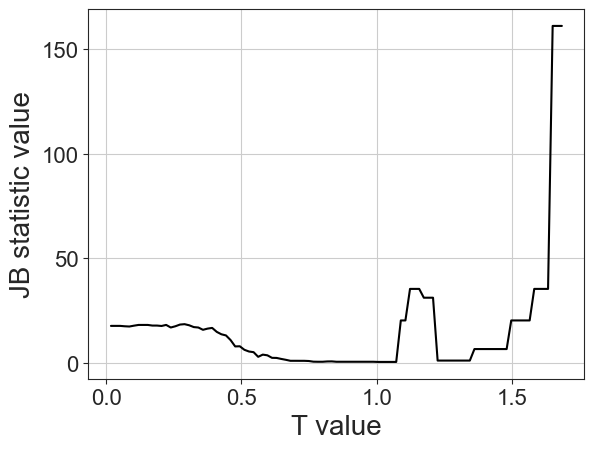

In [51]:
lst = segmentationMultimodalDistr (bimodal_FarSimilarModes['data'],bins = 100, classes = 2, stat = 'average')
bimodal_FarSimilarModes['Adapt_algo']=lst[3]['Adap_Jenks_Class']
error=np.sum(np.abs(bimodal_FarSimilarModes['Adapt_algo']-bimodal_FarSimilarModes['true_class']))
print("Classification Error", 100*error/(2*size), " %")

plt.figure()
plt.plot(lst[1],lst[2],c='black')
plt.xlabel("T value",size=20)
plt.ylabel("JB statistic value",size=20)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.savefig(path+"AdapJenks_JB_TwoFarGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_JB_TwoFarGoodModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


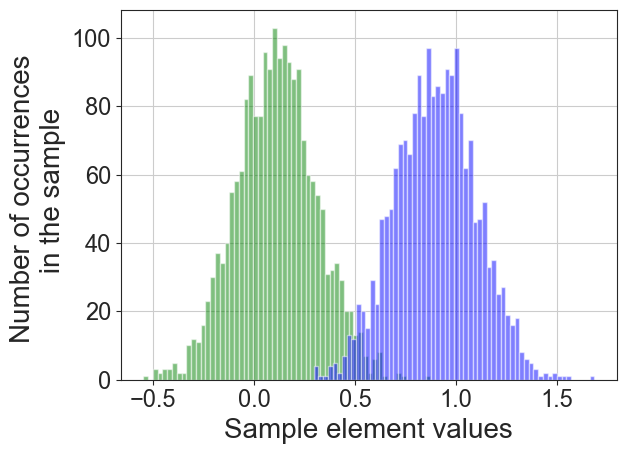

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


JB statistic for the First class:  SignificanceResult(statistic=0.5791799477505472, pvalue=0.748570438097619)
JB statistic for the Second class:  SignificanceResult(statistic=0.38961539729830635, pvalue=0.8229929054873959)
accuracy:  1.0
precision:  1.0
f1:  1.0


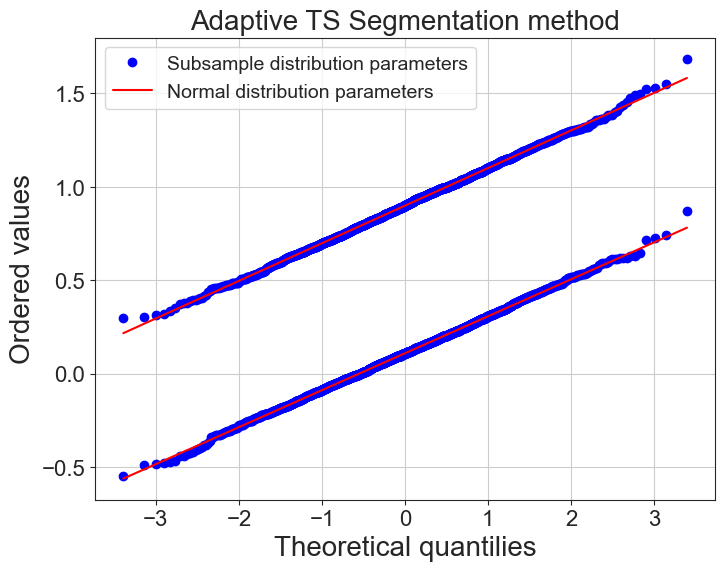

In [52]:
import matplotlib.pyplot as plt
df_left = bimodal_FarSimilarModes.loc[bimodal_FarSimilarModes['Adapt_algo'] == 0]
df_right = bimodal_FarSimilarModes.loc[bimodal_FarSimilarModes['Adapt_algo'] == 1]

plt.figure()
df_left['data'].hist(color = 'green', bins = 60, alpha = 0.5)
df_right['data'].hist(color = 'blue', bins = 60, alpha = 0.5)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"AdapJenks_TwoFarGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_TwoFarGoodModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()

cl1 = bimodal_FarSimilarModes['data'].loc[bimodal_FarSimilarModes['Adapt_algo'] == 0].to_numpy()
cl2 = bimodal_FarSimilarModes['data'].loc[bimodal_FarSimilarModes['Adapt_algo'] == 1].to_numpy()
print("JB statistic for the First class: ", stats.jarque_bera(cl1))
print("JB statistic for the Second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['Adapt_algo']))
print('precision: ', average_precision_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['Adapt_algo']))
print('f1: ', f1_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['Adapt_algo']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Adaptive TS Segmentation method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoFarGoodModes_Adapt_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarGoodModes_Adapt_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

In [53]:
JB = lst[2].copy()
T_mas = lst[1].copy()
T_mas

array([0.01720037, 0.03422126, 0.05124215, 0.06826304, 0.08528393,
       0.10230482, 0.11932571, 0.1363466 , 0.15336749, 0.17038838,
       0.18740927, 0.20443015, 0.22145104, 0.23847193, 0.25549282,
       0.27251371, 0.2895346 , 0.30655549, 0.32357638, 0.34059727,
       0.35761816, 0.37463905, 0.39165994, 0.40868083, 0.42570172,
       0.44272261, 0.4597435 , 0.47676439, 0.49378528, 0.51080617,
       0.52782706, 0.54484794, 0.56186883, 0.57888972, 0.59591061,
       0.6129315 , 0.62995239, 0.64697328, 0.66399417, 0.68101506,
       0.69803595, 0.71505684, 0.73207773, 0.74909862, 0.76611951,
       0.7831404 , 0.80016129, 0.81718218, 0.83420307, 0.85122396,
       0.86824485, 0.88526573, 0.90228662, 0.91930751, 0.9363284 ,
       0.95334929, 0.97037018, 0.98739107, 1.00441196, 1.02143285,
       1.03845374, 1.05547463, 1.07249552, 1.08951641, 1.1065373 ,
       1.12355819, 1.14057908, 1.15759997, 1.17462086, 1.19164175,
       1.20866264, 1.22568352, 1.24270441, 1.2597253 , 1.27674

##### посмотрим ошибку определения класса в зависимости от порога 

0.01720037004261089 2.5
0.034221259545107366 2.5
0.05124214904760384 2.5
0.06826303855010032 2.525
0.0852839280525968 2.525
0.10230481755509327 2.45
0.11932570705758976 2.4
0.13634659656008621 2.4
0.1533674860625827 2.4
0.17038837556507916 2.375
0.18740926506757563 2.375
0.2044301545700721 2.4
0.2214510440725686 2.4
0.23847193357506508 2.3
0.25549282307756155 2.25
0.272513712580058 2.35
0.2895346020825545 2.325
0.30655549158505097 2.275
0.32357638108754744 2.2
0.3405972705900439 2.225
0.3576181600925404 2.15
0.37463904959503685 2.05
0.3916599390975333 2.025
0.4086808286000298 1.9
0.4257017181025263 1.875
0.4427226076050228 1.85
0.45974349710751927 1.825
0.47676438661001574 1.55
0.4937852761125122 1.5
0.5108061656150087 1.425
0.5278270551175052 1.325
0.5448479446200016 1.2
0.5618688341224981 0.975
0.5788897236249946 0.925
0.595910613127491 0.825
0.6129315026299875 0.6
0.629952392132484 0.525
0.6469732816349805 0.45
0.6639941711374769 0.325
0.6810150606399734 0.2
0.6980359501424699 0.2
0

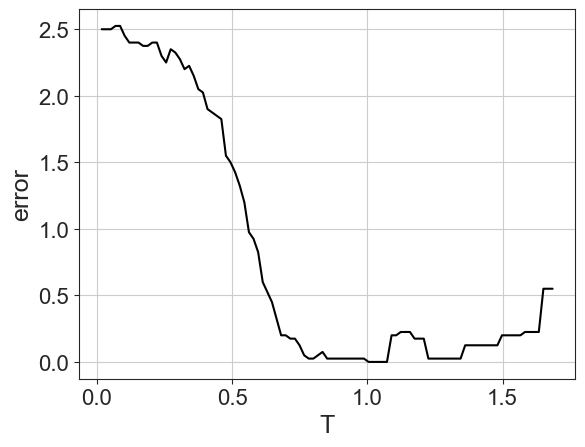

In [55]:
err_mas = []
for t in T_mas: 
    lst = segmentationMultimodalDistrOneTresh(bimodal_FarSimilarModes['data'],t, classes = 2, stat = 'average')
    bimodal_FarSimilarModes['Adapt_algo']=lst[3]['Adap_Jenks_Class']
    err=(np.sum(np.abs(bimodal_FarSimilarModes['Adapt_algo']-bimodal_FarSimilarModes['true_class'])))
    err_mas.append(100*err/(2*size))
    print(t,100*err/(2*size))
plt.figure()
plt.plot(T_mas,err_mas,c='black')
plt.xlabel("T",size=18)
plt.ylabel("error",size=18)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


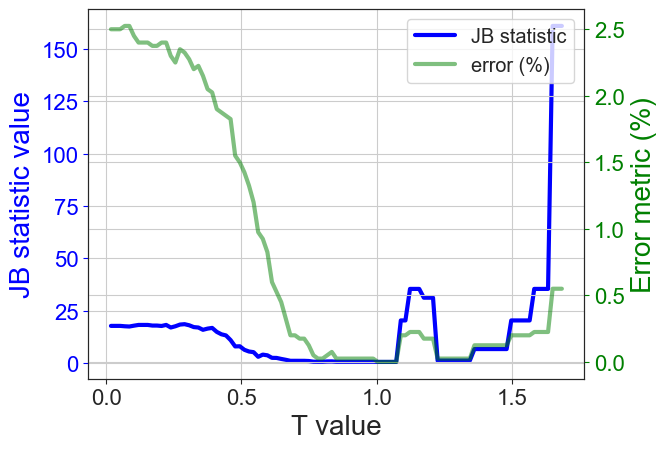

In [56]:
fig, ax1 = plt.subplots()

ax1.plot(T_mas, JB, 'b', label='JB statistic', lw = 3)
ax1.set_xlabel('T value', size = 20)
ax1.set_ylabel('JB statistic value', color='b', size = 20)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(T_mas, err_mas, 'g', label='error (%)', lw=3, alpha = 0.5)
ax2.set_ylabel('Error metric (%)', color='g', size = 20)
ax2.tick_params('y', colors='g')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2 
labels = labels1 + labels2 
plt.legend(lines, labels, fontsize = 'x-large')
plt.savefig(path+"AdapJenks_error_TwoFarGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_error_TwoFarGoodModes.png",bbox_inches = 'tight', dpi = 300)

plt.show()

### 2.1.3. Jenks algo

The obtained threshold value for Jenks clustering 0.5026774495053247
Classification Error 2.5  %


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


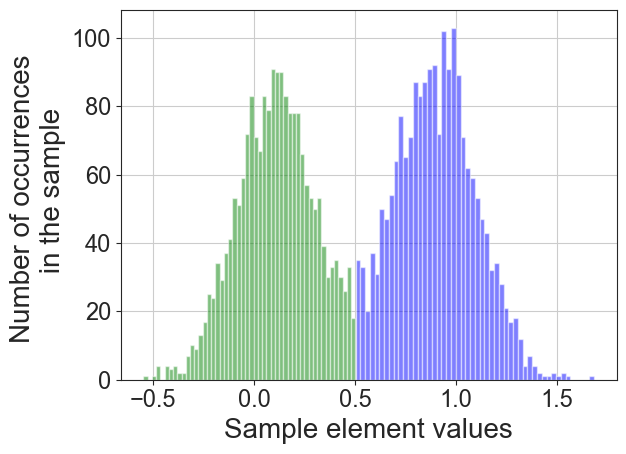

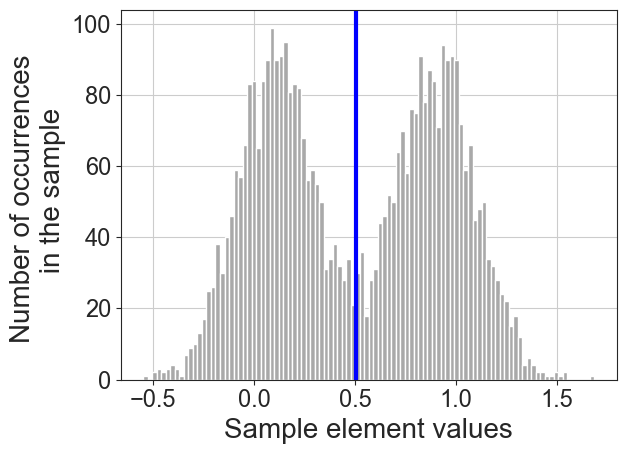

In [58]:
d = bimodal_FarSimilarModes['data'].to_numpy().copy()
breaks = get_jenks_breaks(d, 2)
print("The obtained threshold value for Jenks clustering", breaks[1])
bimodal_FarSimilarModes['Jenks_class'] = np.where(bimodal_FarSimilarModes['data']<breaks[1],0,1)

bimodal_FarSimilarModes['diff'] = np.abs(bimodal_FarSimilarModes['true_class']-bimodal_FarSimilarModes['Jenks_class'])
    #считаем процент ошибок 
error=np.sum(bimodal_FarSimilarModes['diff'])
print("Classification Error", 100*error/(2*size), " %")

df_left = bimodal_FarSimilarModes.loc[bimodal_FarSimilarModes["Jenks_class"] == 0]
df_right = bimodal_FarSimilarModes.loc[bimodal_FarSimilarModes["Jenks_class"] == 1]
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
df_left['data'].hist(color = 'green', bins = 50, alpha = 0.5)
df_right['data'].hist(color = 'blue', bins = 50, alpha = 0.5)
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_TwoFarGoodModes_Jenks_Result.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarGoodModes_Jenks_Result.png",bbox_inches = 'tight', dpi = 300)
plt.show()


#draw a threshold on the histogram
plt.hist(bimodal_FarSimilarModes['data'], bins = 100, color = 'darkgray')
plt.axvline(x=breaks[1], color ='blue', lw = 3 )
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


JB statistic for the First Class:  SignificanceResult(statistic=15.389870029455674, pvalue=0.00045512656414936235)
JB statistic for the Second Class:  SignificanceResult(statistic=17.796660826199787, pvalue=0.00013661682984628066)
accuracy:  0.975
precision:  0.9626746506986028
f1:  0.975024975024975


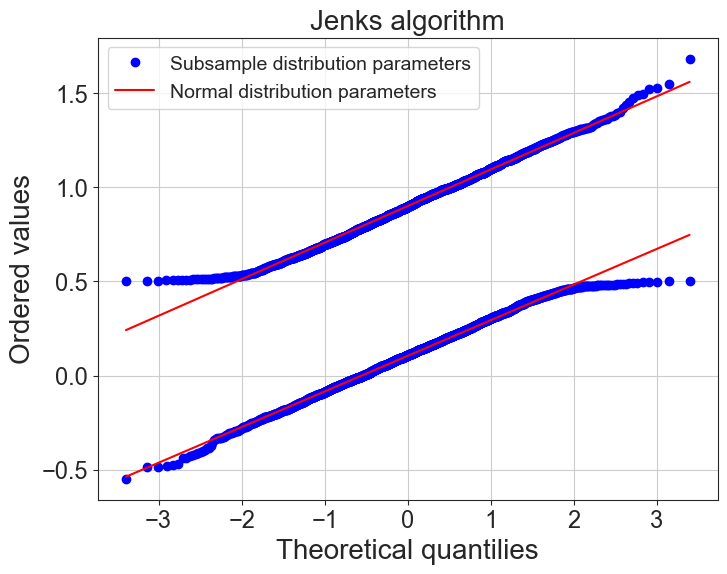

In [59]:
import matplotlib.pyplot as plt
df_left = bimodal_FarSimilarModes.loc[bimodal_FarSimilarModes['Jenks_class'] == 0]
df_right = bimodal_FarSimilarModes.loc[bimodal_FarSimilarModes['Jenks_class'] == 1]


cl1 = bimodal_FarSimilarModes['data'].loc[bimodal_FarSimilarModes['Jenks_class'] == 0].to_numpy()
cl2 = bimodal_FarSimilarModes['data'].loc[bimodal_FarSimilarModes['Jenks_class'] == 1].to_numpy()
print("JB statistic for the First Class: ", stats.jarque_bera(cl1))
print("JB statistic for the Second Class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['Jenks_class']))
print('precision: ', average_precision_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['Jenks_class']))
print('f1: ', f1_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['Jenks_class']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Jenks algorithm',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoFarGoodModes_Jenks_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarGoodModes_Jenks_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 2.2. Weak-separated modes

### 2.2.1. Adaptive algo 

Classification Error 0.6  %


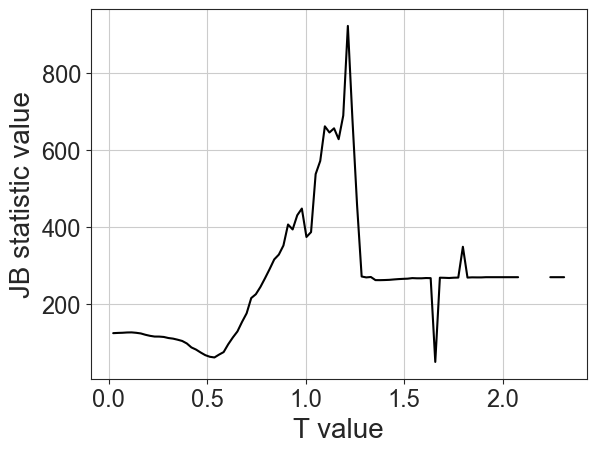

In [62]:
lst = segmentationMultimodalDistr (bimodal_FarDifferentModes['data'],bins = 100, classes = 2, stat = 'average')
bimodal_FarDifferentModes['Adapt_algo']=lst[3]['Adap_Jenks_Class']
error=np.sum(np.abs(bimodal_FarDifferentModes['Adapt_algo']-bimodal_FarDifferentModes['true_class']))
print("Classification Error", 100*error/(2*size), " %")

plt.plot(lst[1],lst[2],c='black')
plt.xlabel("T value",size=20)
plt.ylabel("JB statistic value",size=20)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.savefig(path+"AdapJenks_JB_TwoFarBadModes.eps",bbox_inches = 'tight', dpi = 800)
plt.savefig(path+"AdapJenks_JB_TwoFarBadModes.png",bbox_inches = 'tight', dpi = 800)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


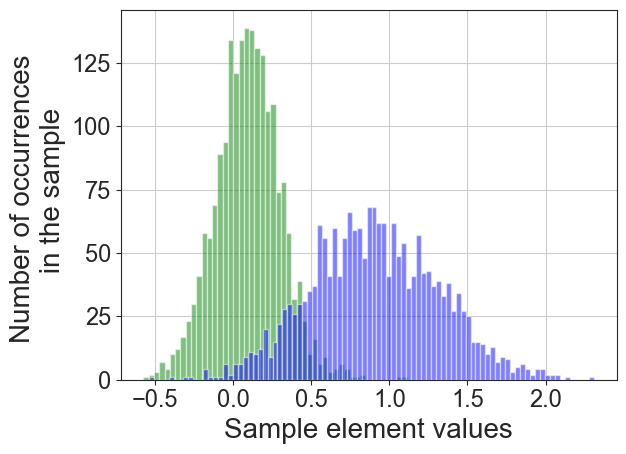

JB statistic for the first class:  SignificanceResult(statistic=49.92345698343778, pvalue=1.4429758320070492e-11)
JB statistic for the second class:  SignificanceResult(statistic=2.9446070071603607, pvalue=0.22939646054741955)
accuracy:  0.994
precision:  0.994
f1:  0.993963782696177


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


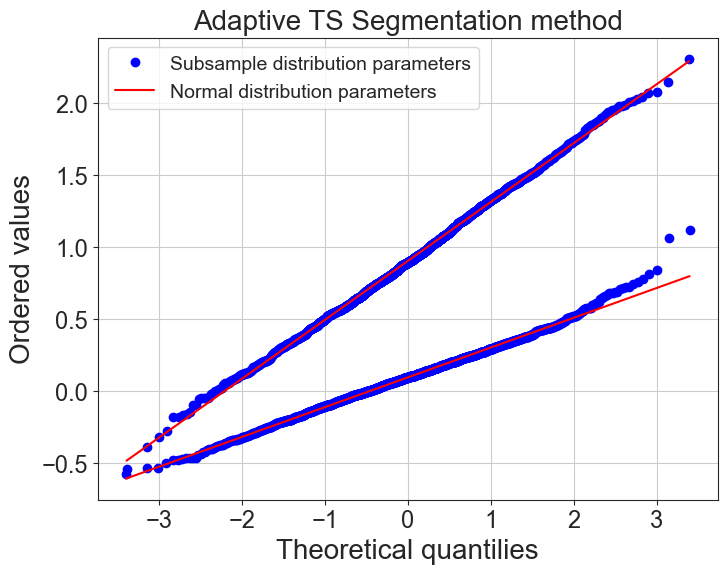

In [63]:
import matplotlib.pyplot as plt
df_left = bimodal_FarDifferentModes.loc[bimodal_FarDifferentModes['Adapt_algo'] == 0]
df_right = bimodal_FarDifferentModes.loc[bimodal_FarDifferentModes['Adapt_algo'] == 1]

plt.figure()
df_left['data'].hist(color = 'green', bins = 50, alpha = 0.5)
df_right['data'].hist(color = 'blue', bins = 90, alpha = 0.5)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"AdapJenks_TwoFarBadModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_TwoFarBadModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()

cl1 = bimodal_FarDifferentModes['data'].loc[bimodal_FarDifferentModes['Adapt_algo'] == 0].to_numpy()
cl2 = bimodal_FarDifferentModes['data'].loc[bimodal_FarDifferentModes['Adapt_algo'] == 1].to_numpy()
print("JB statistic for the first class: ", stats.jarque_bera(cl1))
print("JB statistic for the second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['Adapt_algo']))
print('precision: ', average_precision_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['Adapt_algo']))
print('f1: ', f1_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['Adapt_algo']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Adaptive TS Segmentation method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoFarBadModes_Adapt_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarBadModes_Adapt_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

In [64]:
JB = lst[2].copy()
T_mas = lst[1].copy()
T_mas

array([0.02315539, 0.04650709, 0.06985879, 0.09321049, 0.11656219,
       0.13991389, 0.16326559, 0.18661729, 0.209969  , 0.2333207 ,
       0.2566724 , 0.2800241 , 0.3033758 , 0.3267275 , 0.3500792 ,
       0.3734309 , 0.3967826 , 0.4201343 , 0.443486  , 0.46683771,
       0.49018941, 0.51354111, 0.53689281, 0.56024451, 0.58359621,
       0.60694791, 0.63029961, 0.65365131, 0.67700301, 0.70035471,
       0.72370642, 0.74705812, 0.77040982, 0.79376152, 0.81711322,
       0.84046492, 0.86381662, 0.88716832, 0.91052002, 0.93387172,
       0.95722342, 0.98057512, 1.00392683, 1.02727853, 1.05063023,
       1.07398193, 1.09733363, 1.12068533, 1.14403703, 1.16738873,
       1.19074043, 1.21409213, 1.23744383, 1.26079554, 1.28414724,
       1.30749894, 1.33085064, 1.35420234, 1.37755404, 1.40090574,
       1.42425744, 1.44760914, 1.47096084, 1.49431254, 1.51766425,
       1.54101595, 1.56436765, 1.58771935, 1.61107105, 1.63442275,
       1.65777445, 1.68112615, 1.70447785, 1.72782955, 1.75118

##### смотрим разницу между порогом и ошибкой 

0.0231553885352891 12.6
0.046507089417869754 12.75
0.06985879030045042 12.825
0.09321049118303108 13.0
0.11656219206561173 13.1
0.13991389294819237 13.15
0.16326559383077305 13.25
0.1866172947133537 13.2
0.20996899559593435 13.075
0.233320696478515 13.625
0.25667239736109565 13.95
0.2800240982436763 14.125
0.303375799126257 14.35
0.32672750000883766 14.4
0.3500792008914183 14.825
0.37343090177399896 15.3
0.3967826026565796 15.225
0.42013430353916026 15.075
0.4434860044217409 15.4
0.46683770530432156 15.45
0.4901894061869022 15.55
0.513541107069483 15.375
0.5368928079520635 15.45
0.5602445088346442 15.025
0.5835962097172249 15.025
0.6069479105998056 15.225
0.6302996114823862 15.275
0.6536513123649669 15.125
0.6770030132475475 15.575
0.7003547141301282 15.175
0.7237064150127088 18.4
0.7470581158952895 19.1
0.7704098167778701 18.75
0.7937615176604508 17.625
0.8171132185430314 17.375
0.8404649194256121 17.75
0.8638166203081927 16.6
0.8871683211907734 14.95
0.910520022073354 13.1
0.93387172

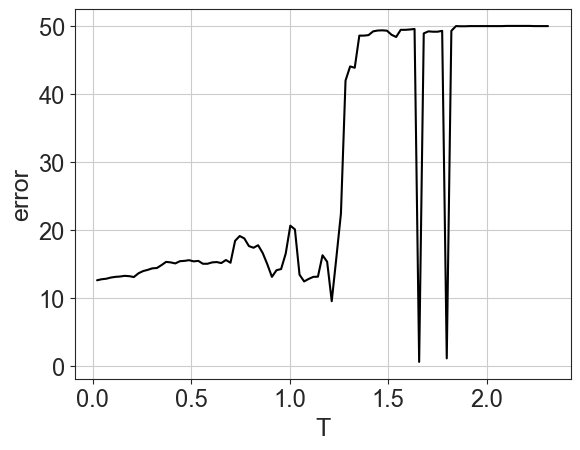

In [66]:
err_mas = []
for t in T_mas: 
    lst = segmentationMultimodalDistrOneTresh(bimodal_FarDifferentModes['data'],t, classes = 2, stat = 'average')
    bimodal_FarDifferentModes['Adapt_algo']=lst[3]['Adap_Jenks_Class']
    err=(np.sum(np.abs(bimodal_FarDifferentModes['Adapt_algo']-bimodal_FarDifferentModes['true_class'])))
    err_mas.append(100*err/(2*size))
    print(t,100*err/(2*size))
plt.plot(T_mas,err_mas,c='black')
plt.xlabel("T",size=18)
plt.ylabel("error",size=18)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


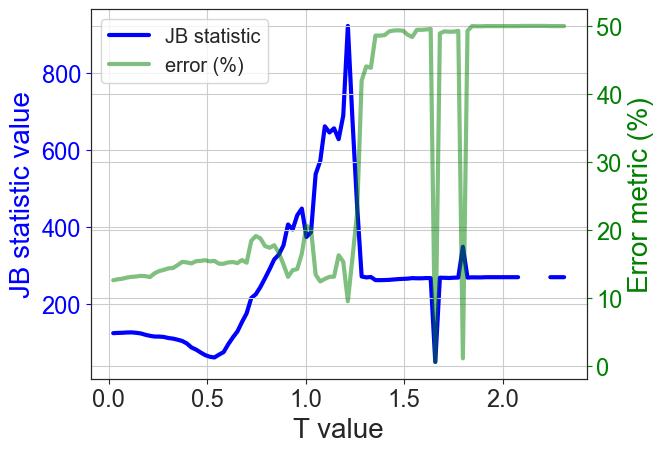

In [67]:
fig, ax1 = plt.subplots()

ax1.plot(T_mas, JB, 'b', label='JB statistic', lw = 3)
ax1.set_xlabel('T value', size = 20)
ax1.set_ylabel('JB statistic value', color='b', size = 20)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(T_mas, err_mas, 'g', label='error (%)', lw=3, alpha = 0.5)
ax2.set_ylabel('Error metric (%)', color='g', size = 20)
ax2.tick_params('y', colors='g')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2 
labels = labels1 + labels2 
plt.legend(lines, labels, fontsize = 'x-large')
plt.savefig(path+"AdapJenks_error_TwoFarBadModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_error_TwoFarBadModes.png",bbox_inches = 'tight', dpi = 300)

plt.show()

### 2.2.3. Jenks algo 

The obtained threshold value for Jenks clustering 0.6030454518277062
Classification error 12.575  %


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


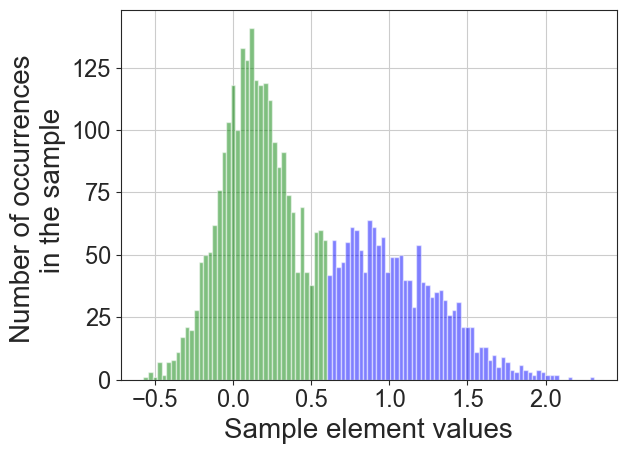

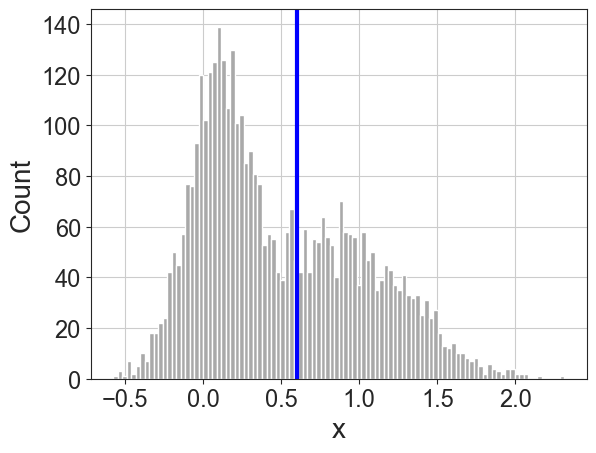

In [69]:
d = bimodal_FarDifferentModes['data'].to_numpy().copy()
breaks = get_jenks_breaks(d, 2)
print("The obtained threshold value for Jenks clustering", breaks[1])
bimodal_FarDifferentModes['Jenks_class'] = np.where(bimodal_FarDifferentModes['data']<breaks[1],0,1)

bimodal_FarDifferentModes['diff'] = np.abs(bimodal_FarDifferentModes['true_class']-bimodal_FarDifferentModes['Jenks_class'])

error=np.sum(bimodal_FarDifferentModes['diff'])
print("Classification error", 100*error/(2*size), " %")

df_left = bimodal_FarDifferentModes.loc[bimodal_FarDifferentModes["Jenks_class"] == 0]
df_right = bimodal_FarDifferentModes.loc[bimodal_FarDifferentModes["Jenks_class"] == 1]

df_left['data'].hist(color = 'green', bins = 40, alpha = 0.5)
df_right['data'].hist(color = 'blue', bins = 60, alpha = 0.5)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_TwoFarBadModes_Jenks_Result.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarBadModes_Jenks_Result.png",bbox_inches = 'tight', dpi = 300)
plt.show()


#draw a threshold on the histogram
plt.hist(bimodal_FarDifferentModes['data'], bins = 100, color = 'darkgray')
plt.axvline(x=breaks[1], color ='blue', lw = 3 )
plt.xlabel('x', size= 20)
plt.ylabel('Count', size= 20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
#plt.savefig(path+"synt_TwoFarBadModes_Jenks_Result.eps",bbox_inches = 'tight', dpi = 300)
#plt.savefig(path+"synt_TwoFarBadModes_Jenks_Result.png",bbox_inches = 'tight', dpi = 300)
plt.show()

JB statistic for the first class:  SignificanceResult(statistic=15.94364341361783, pvalue=0.0003450498333715131)
JB statistic for the second class:  SignificanceResult(statistic=124.52376446841156, pvalue=9.120278761996515e-28)
accuracy:  0.87425
precision:  0.8708142622950819
f1:  0.8573049645390071


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


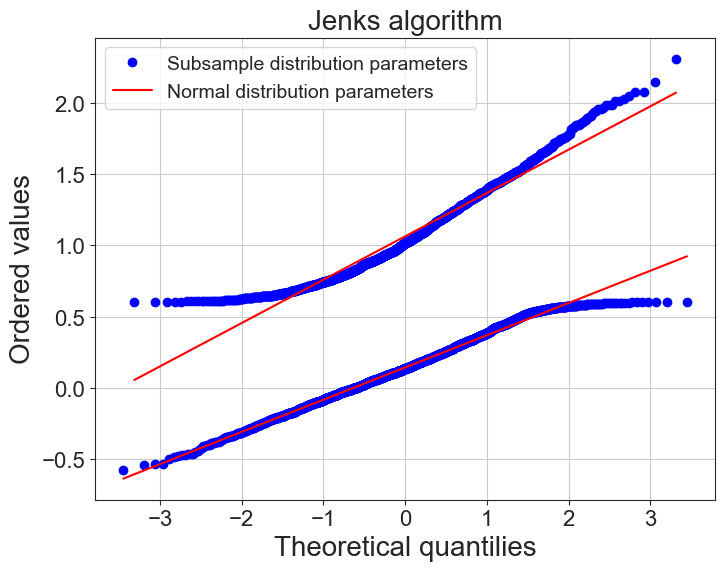

In [70]:
df_left = bimodal_FarDifferentModes.loc[bimodal_FarDifferentModes['Jenks_class'] == 0]
df_right = bimodal_FarDifferentModes.loc[bimodal_FarDifferentModes['Jenks_class'] == 1]


cl1 = bimodal_FarDifferentModes['data'].loc[bimodal_FarDifferentModes['Jenks_class'] == 0].to_numpy()
cl2 = bimodal_FarDifferentModes['data'].loc[bimodal_FarDifferentModes['Jenks_class'] == 1].to_numpy()
print("JB statistic for the first class: ", stats.jarque_bera(cl1))
print("JB statistic for the second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['Jenks_class']))
print('precision: ', average_precision_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['Jenks_class']))
print('f1: ', f1_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['Jenks_class']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Jenks algorithm',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoFarBadModes_Jenks_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarBadModes_Jenks_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 2.3. Fuzzy modes

### 2.3.1. Adaptive algo

Classification Error 0.225  %


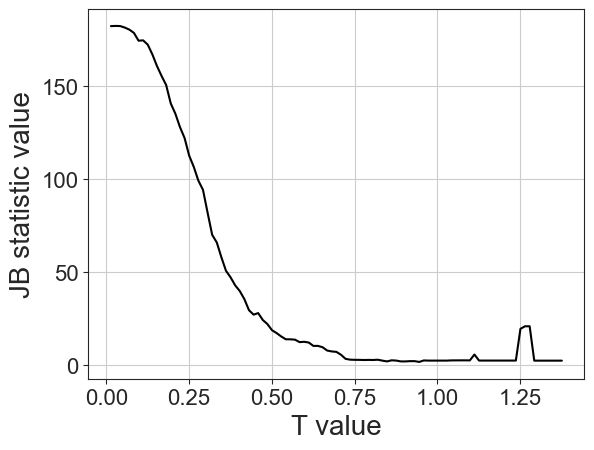

In [73]:
lst = segmentationMultimodalDistr (bimodal_NearSimilarModes['data'],bins = 100, classes = 2, stat = 'average')
bimodal_NearSimilarModes['Adapt_algo']=lst[3]['Adap_Jenks_Class']
error=np.sum(np.abs(bimodal_NearSimilarModes['Adapt_algo']-bimodal_NearSimilarModes['true_class']))
print("Classification Error", 100*error/(2*size), " %")

plt.plot(lst[1],lst[2],c='black')
plt.xlabel("T value",size=20)
plt.ylabel("JB statistic value",size=20)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.savefig(path+"AdapJenks_JB_TwoNearGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_JB_TwoNearGoodModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


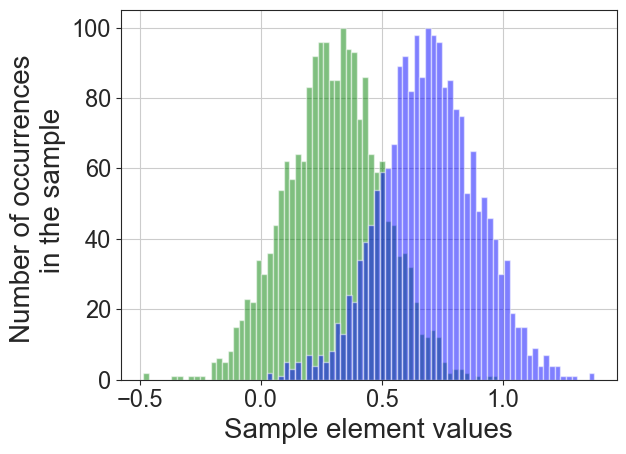

JB statistic for the first class:  SignificanceResult(statistic=1.4921613785173924, pvalue=0.4742215367999457)
JB statistic for the second class:  SignificanceResult(statistic=1.5016801941196642, pvalue=0.47196988563165954)
accuracy:  0.99775
precision:  0.99700225338007
f1:  0.9977483112334251


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


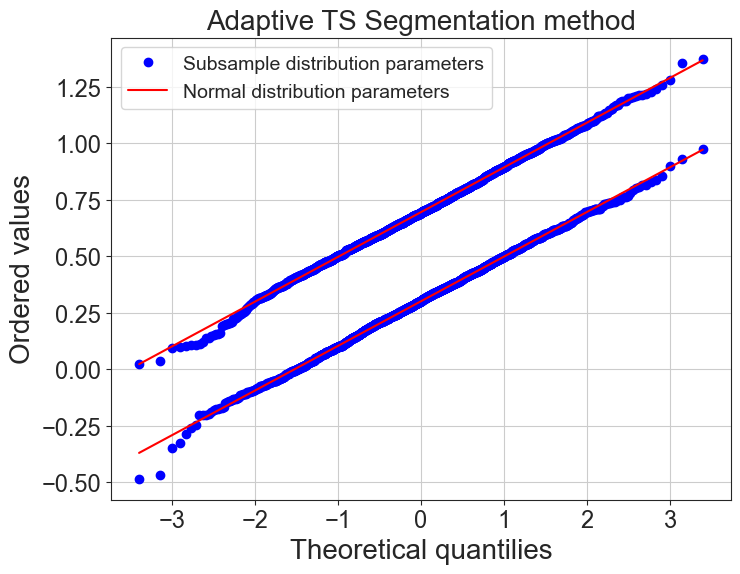

In [74]:
import matplotlib.pyplot as plt
df_left = bimodal_NearSimilarModes.loc[bimodal_NearSimilarModes['Adapt_algo'] == 0]
df_right = bimodal_NearSimilarModes.loc[bimodal_NearSimilarModes['Adapt_algo'] == 1]

plt.figure()
df_left['data'].hist(color = 'green', bins = 63, alpha = 0.5)
df_right['data'].hist(color = 'blue', bins = 58, alpha = 0.5)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"AdapJenks_TwoNearGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_TwoNearGoodModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()

cl1 = bimodal_NearSimilarModes['data'].loc[bimodal_NearSimilarModes['Adapt_algo'] == 0].to_numpy()
cl2 = bimodal_NearSimilarModes['data'].loc[bimodal_NearSimilarModes['Adapt_algo'] == 1].to_numpy()
print("JB statistic for the first class: ", stats.jarque_bera(cl1))
print("JB statistic for the second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['Adapt_algo']))
print('precision: ', average_precision_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['Adapt_algo']))
print('f1: ', f1_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['Adapt_algo']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Adaptive TS Segmentation method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoNearGoodModes_Adapt_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoNearGoodModes_Adapt_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

In [75]:
JB = lst[2].copy()
T_mas = lst[1].copy()
T_mas

array([0.01391434, 0.02780861, 0.04170289, 0.05559717, 0.06949145,
       0.08338573, 0.09728001, 0.11117429, 0.12506857, 0.13896284,
       0.15285712, 0.1667514 , 0.18064568, 0.19453996, 0.20843424,
       0.22232852, 0.23622279, 0.25011707, 0.26401135, 0.27790563,
       0.29179991, 0.30569419, 0.31958847, 0.33348275, 0.34737702,
       0.3612713 , 0.37516558, 0.38905986, 0.40295414, 0.41684842,
       0.4307427 , 0.44463698, 0.45853125, 0.47242553, 0.48631981,
       0.50021409, 0.51410837, 0.52800265, 0.54189693, 0.5557912 ,
       0.56968548, 0.58357976, 0.59747404, 0.61136832, 0.6252626 ,
       0.63915688, 0.65305116, 0.66694543, 0.68083971, 0.69473399,
       0.70862827, 0.72252255, 0.73641683, 0.75031111, 0.76420539,
       0.77809966, 0.79199394, 0.80588822, 0.8197825 , 0.83367678,
       0.84757106, 0.86146534, 0.87535962, 0.88925389, 0.90314817,
       0.91704245, 0.93093673, 0.94483101, 0.95872529, 0.97261957,
       0.98651384, 1.00040812, 1.0143024 , 1.02819668, 1.04209

0.01391433550448935 15.7
0.02780861420605448 15.75
0.04170289290761962 15.825
0.055597171609184745 15.725
0.06949145031074988 15.7
0.08338572901231502 15.6
0.09728000771388015 15.6
0.11117428641544529 15.175
0.12506856511701042 15.2
0.13896284381857554 15.175
0.15285712252014066 15.2
0.16675140122170581 14.95
0.18064567992327094 15.05
0.19453995862483608 14.625
0.2084342373264012 14.4
0.22232851602796636 14.025
0.23622279472953148 13.7
0.2501170734310966 13.35
0.26401135213266175 13.4
0.27790563083422687 12.725
0.291799909535792 12.45
0.30569418823735717 11.775
0.3195884669389223 11.625
0.3334827456404874 10.9
0.34737702434205253 10.55
0.36127130304361765 10.55
0.37516558174518283 10.05
0.38905986044674795 9.35
0.4029541391483131 8.425
0.4168484178498782 8.325
0.43074269655144337 8.15
0.4446369752530085 8.0
0.4585312539545736 7.125
0.47242553265613874 7.05
0.48631981135770386 6.425
0.5002140900592691 6.125
0.5141083687608342 5.775
0.5280026474623993 5.325
0.5418969261639645 5.2
0.55579

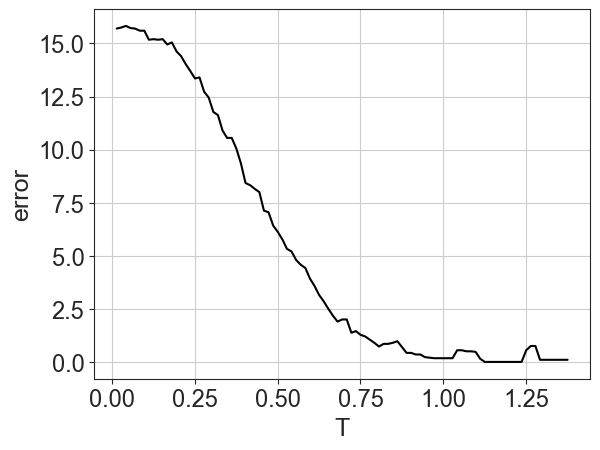

In [76]:
err_mas = []
for t in T_mas: 
    lst = segmentationMultimodalDistrOneTresh(bimodal_NearSimilarModes['data'],t, classes = 2, stat = 'average')
    bimodal_NearSimilarModes['Adapt_algo']=lst[3]['Adap_Jenks_Class']
    err=(np.sum(np.abs(bimodal_NearSimilarModes['Adapt_algo']-bimodal_NearSimilarModes['true_class'])))
    err_mas.append(100*err/(2*size))
    print(t,100*err/(2*size))
plt.plot(T_mas,err_mas,c='black')
plt.xlabel("T",size=18)
plt.ylabel("error",size=18)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


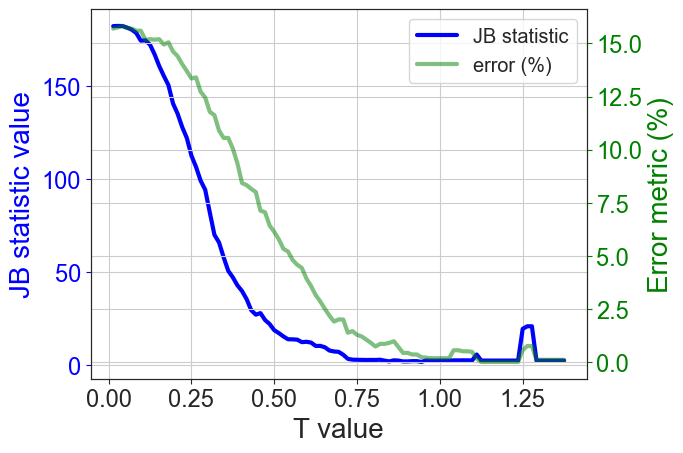

In [77]:
fig, ax1 = plt.subplots()

ax1.plot(T_mas, JB, 'b', label='JB statistic', lw = 3)
ax1.set_xlabel('T value', size = 20)
ax1.set_ylabel('JB statistic value', color='b', size = 20)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(T_mas, err_mas, 'g', label='error (%)', lw=3, alpha = 0.5)
ax2.set_ylabel('Error metric (%)', color='g', size = 20)
ax2.tick_params('y', colors='g')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2 
labels = labels1 + labels2 
plt.legend(lines, labels, fontsize = 'x-large')
plt.savefig(path+"AdapJenks_error_TwoNearGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_error_TwoNearGoodModes.png",bbox_inches = 'tight', dpi = 300)

plt.show()

### 2.3.3. Jenks algo

The obtained threshold value for Jenks clustering 0.4950401083369532
Classification error 15.775  %


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


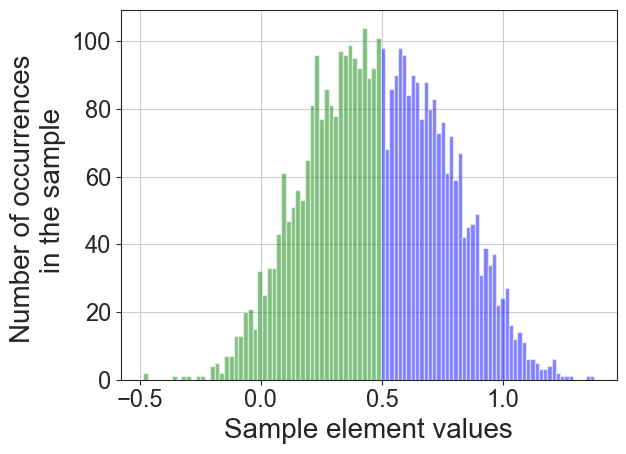

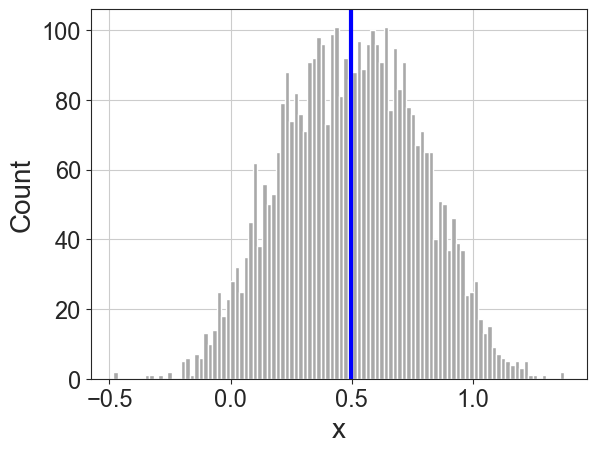

In [79]:
d = bimodal_NearSimilarModes['data'].to_numpy().copy()
breaks = get_jenks_breaks(d, 2)
print("The obtained threshold value for Jenks clustering", breaks[1])
bimodal_NearSimilarModes['Jenks_class'] = np.where(bimodal_NearSimilarModes.data > breaks[1], 1, 0)

#считаем процент ошибок 
error=np.sum(np.abs(bimodal_NearSimilarModes['Jenks_class']-bimodal_NearSimilarModes['true_class']))
print("Classification error", 100*error/(2*size), " %")

df_left = bimodal_NearSimilarModes.loc[bimodal_NearSimilarModes["Jenks_class"] == 0]
df_right = bimodal_NearSimilarModes.loc[bimodal_NearSimilarModes["Jenks_class"] == 1]

df_left['data'].hist(color = 'green', bins = 50, alpha = 0.5)
df_right['data'].hist(color = 'blue', bins = 50, alpha = 0.5)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"synt_TwoNearGoodModes_Jenks_Result.eps",bbox_inches = 'tight', dpi = 800)
plt.savefig(path+"synt_TwoNearGoodModes_Jenks_Result.png",bbox_inches = 'tight', dpi = 800)
plt.show()

#рисуем порог на гистограмме 
plt.hist(bimodal_NearSimilarModes['data'], bins = 100, color = 'darkgray')
plt.axvline(x=breaks[1], color ='blue', lw = 3 )
plt.xlabel('x', size= 20)
plt.ylabel('Count', size= 20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.show()

JB statistic for the first class:  SignificanceResult(statistic=182.8611661828092, pvalue=1.959757279055197e-40)
JB statistic for the second class:  SignificanceResult(statistic=176.85360662348498, pvalue=3.951184135098581e-39)
accuracy:  0.84225
precision:  0.7869283242708849
f1:  0.8431518767089237


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


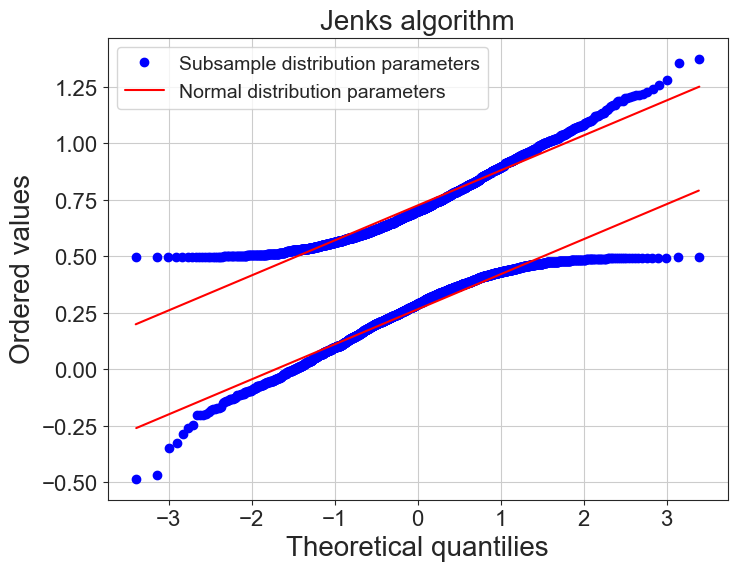

In [80]:
df_left = bimodal_NearSimilarModes.loc[bimodal_NearSimilarModes['Jenks_class'] == 0]
df_right = bimodal_NearSimilarModes.loc[bimodal_NearSimilarModes['Jenks_class'] == 1]


cl1 = bimodal_NearSimilarModes['data'].loc[bimodal_NearSimilarModes['Jenks_class'] == 0].to_numpy()
cl2 = bimodal_NearSimilarModes['data'].loc[bimodal_NearSimilarModes['Jenks_class'] == 1].to_numpy()
print("JB statistic for the first class: ", stats.jarque_bera(cl1))
print("JB statistic for the second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['Jenks_class']))
print('precision: ', average_precision_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['Jenks_class']))
print('f1: ', f1_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['Jenks_class']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Jenks algorithm',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoNearGoodModes_Jenks_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoNearGoodModes_Jenks_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 2.4. Temperature data

### 2.4.1. Adaptive algo

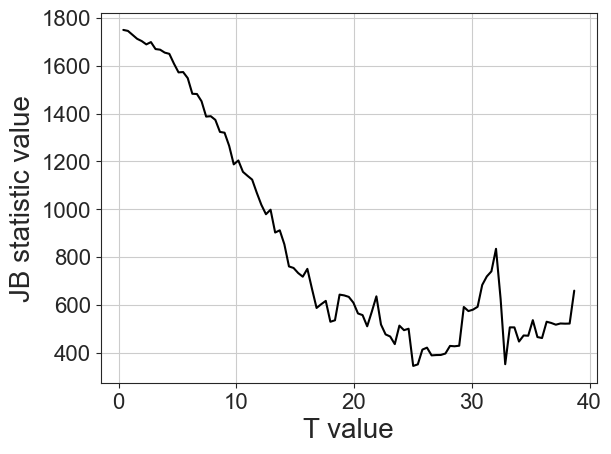

<Figure size 640x480 with 0 Axes>

In [83]:
sens = 't.m_vet'
df = pd.DataFrame()
df[sens] = Rough_DATA_NotAnomalyInPairs[sens]

lst = segmentationMultimodalDistr (df[sens],bins = 100, classes = 3, stat = 'average')
df['Adapt_algo']=lst[3]['Adap_Jenks_Class']

plt.figure()
plt.plot(lst[1],lst[2],c='black')
plt.xlabel("T value",size=20)
plt.ylabel("JB statistic value",size=20)
plt.show()
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.savefig(path+"AdapJenks_JB_Temperature.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_JB_Temperature.png",bbox_inches = 'tight', dpi = 300)
plt.show()

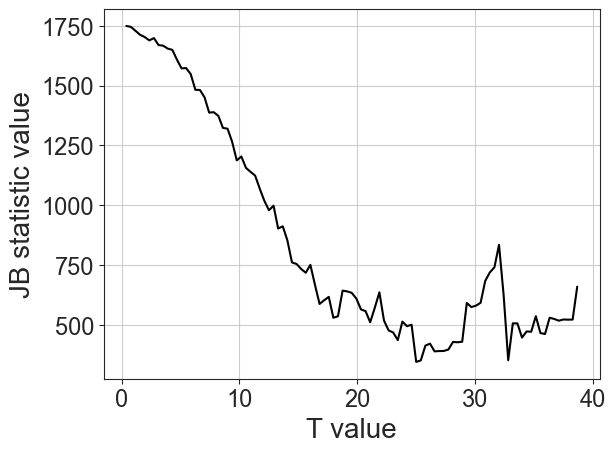

In [84]:
plt.figure()
plt.plot(lst[1],lst[2],c='black')
plt.xlabel("T value",size=20)

plt.ylabel("JB statistic value",size=20)
plt.grid(True)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.savefig(path+"AdapJenks_JB_Temperature.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_JB_Temperature.png",bbox_inches = 'tight', dpi = 300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


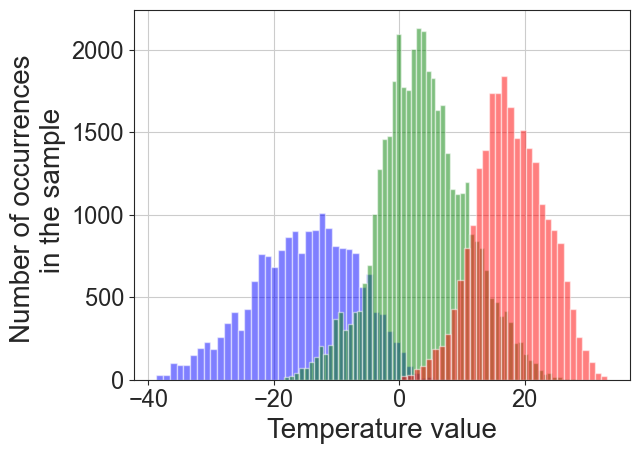

In [85]:
df_left = df.loc[df["Adapt_algo"] == 0]
df_mid = df.loc[df["Adapt_algo"] == 1]
df_right = df.loc[df["Adapt_algo"] == 2]

plt.figure()
df_left[sens].hist(color = 'blue', bins = 43, alpha = 0.5)
df_mid[sens].hist(color = 'green', bins = 60, alpha = 0.5)
df_right[sens].hist(color = 'red', bins = 33, alpha = 0.5)
plt.xlabel('Temperature value', size= 20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"AdapJenks_Temperature.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_Temperature.png",bbox_inches = 'tight', dpi = 300)
plt.show()

JB statistic for d_left:  SignificanceResult(statistic=346.0733096527109, pvalue=7.097994229099091e-76)
JB statistic for d_middle:  SignificanceResult(statistic=31.761724276395665, pvalue=1.2677371160077877e-07)
JB statistic for d_right:  SignificanceResult(statistic=79.52052355156142, pvalue=5.399303145493571e-18)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


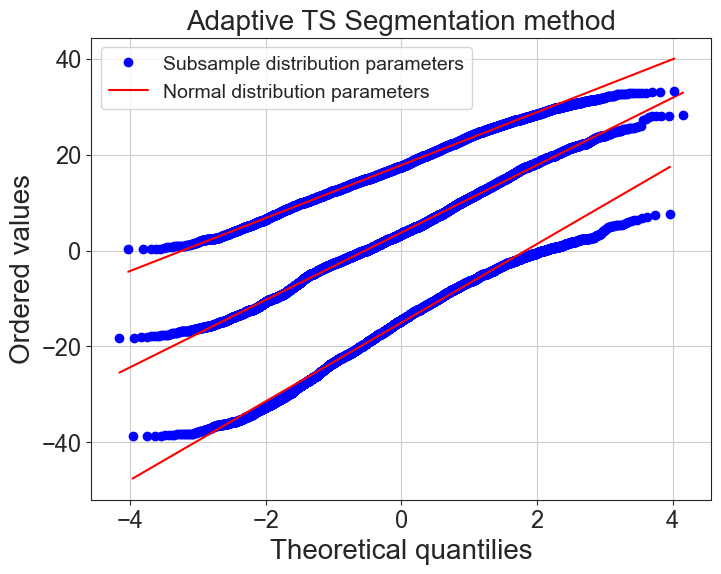

In [86]:
d_left = df_left[sens].to_numpy()
d_middle = df_mid[sens].to_numpy()
d_right = df_right[sens].to_numpy()
print("JB statistic for d_left: ", stats.jarque_bera(d_left))
print("JB statistic for d_middle: ", stats.jarque_bera(d_middle))
print("JB statistic for d_right: ", stats.jarque_bera(d_right))

plt.figure(figsize=(8, 6))

stats.probplot(d_left, dist="norm", plot=plt)
stats.probplot(d_middle, dist="norm", plot=plt)
stats.probplot(d_right, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Adaptive TS Segmentation method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"Temp_AdapJenks_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"Temp_AdapJenks_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


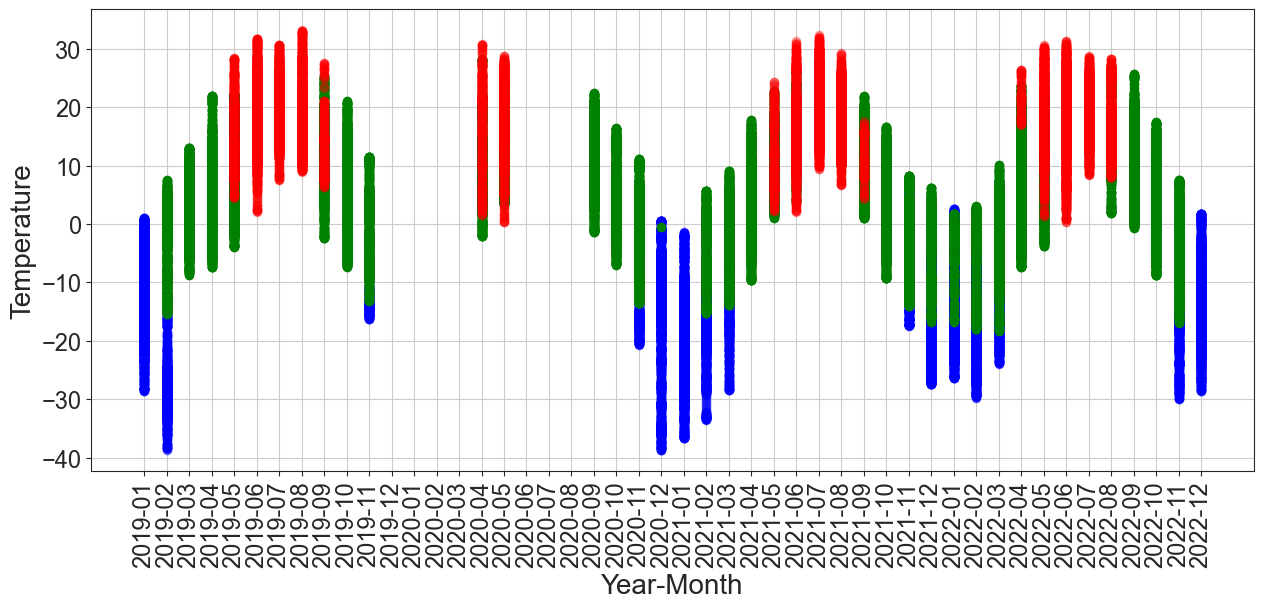

In [87]:
#df = pd.DataFrame()
#df[sens] = Rough_DATA_NotAnomalyInPairs[sens]
#d = df[sens].dropna().to_numpy()

df = df.reset_index()
x = df['DateTime'].to_numpy()
a = [elem[:7] for elem in x]
x = a.copy()

df['Date'] = x
df_left = df.copy()
df_left[sens] = np.where(df_left.Adapt_algo==0, df_left[sens], float('NaN') )
df_mid = df.copy()
df_mid[sens] = np.where(df_mid.Adapt_algo==1, df_mid[sens], float('NaN') )
df_right = df.copy()
df_right[sens] = np.where(df_right.Adapt_algo==2, df_right[sens], float('NaN') )


#df.loc[df["Adap_Jenks_Class"] == 0]
#df_mid = df.loc[df["Adap_Jenks_Class"] == 1]
#df_right = df.loc[df["Adap_Jenks_Class"] == 2]

#plt.ylim(-1, 1)
h=14
plt.figure(figsize=(15,6))
plt.scatter(df_left['Date'], df_left[sens],  c = 'blue',alpha=0.5)
plt.scatter(df_mid['Date'], df_mid[sens],  c = 'green',alpha=1)
plt.scatter(df_right['Date'], df_right[sens], c = 'red',alpha=0.3)
#plt.xticks(np.arange(0,365*4+h,step=h), rotation = 90)
plt.xticks(rotation = 90)
plt.xlabel("Year-Month",size=20)
plt.ylabel("Temperature",size=20)
plt.savefig(path+"Temp_Month_AdaptJenks.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"Temp_Month_AdaptJenks.png",bbox_inches = 'tight', dpi = 300)
plt.show()
df = df.set_index('DateTime')

### 2.4.2. Jenks algo

In [89]:
sens = 't.m_vet'
df = pd.DataFrame()
df[sens] = Rough_DATA_NotAnomalyInPairs[sens]
d = df[sens].dropna().to_numpy()
breaks = get_jenks_breaks(d, 3)
print("The obtained threshold value for Jenks clustering", breaks[1],breaks[2])


The obtained threshold value for Jenks clustering -7.7 9.3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


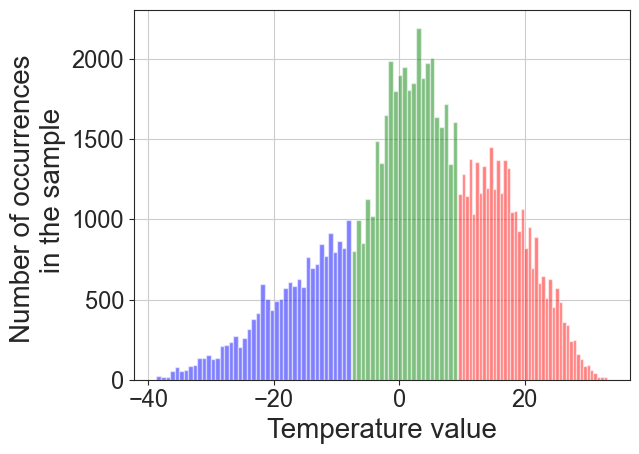

In [90]:
df['Jenks_class'] = df.apply(fill_classes, axis = 1, args =(sens, breaks))

df_left = df.loc[df["Jenks_class"] == 0]
df_middle = df.loc[df["Jenks_class"] == 1]
df_right = df.loc[df["Jenks_class"] == 2]

plt.figure()
df_left[sens].hist(color = 'blue', bins = 43, alpha = 0.5)
df_middle[sens].hist(color = 'green', bins = 23, alpha = 0.5)
df_right[sens].hist(color = 'red', bins = 43, alpha = 0.5)
plt.xlabel('Temperature value', size= 20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.savefig(path+"T_Jenks_Result.eps",bbox_inches = 'tight', dpi = 800)
plt.savefig(path+"T_Jenks_Result.png",bbox_inches = 'tight', dpi = 800)
plt.show()

JB statistic for d_left:  SignificanceResult(statistic=1704.0842467950117, pvalue=0.0)
JB statistic for d_middle:  SignificanceResult(statistic=1501.138488393574, pvalue=0.0)
JB statistic for d_right:  SignificanceResult(statistic=1720.6546621242792, pvalue=0.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


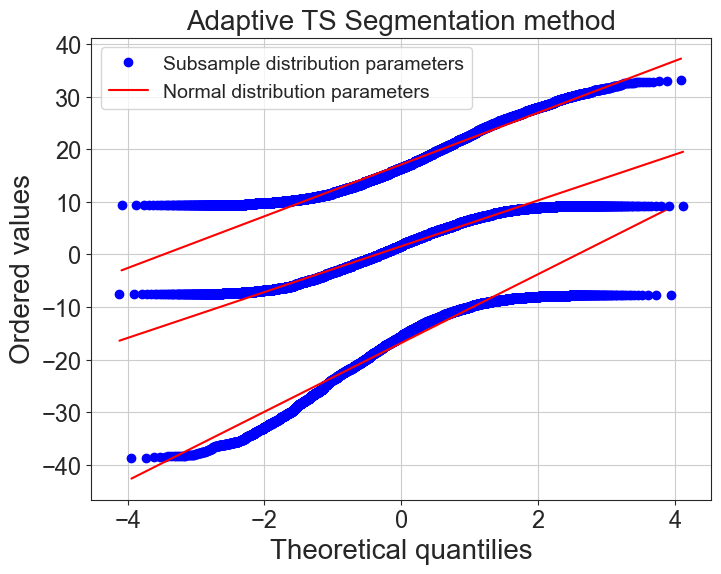

In [91]:
d_left = df_left[sens].to_numpy()
d_middle = df_middle[sens].to_numpy()
d_right = df_right[sens].to_numpy()
print("JB statistic for d_left: ", stats.jarque_bera(d_left))
print("JB statistic for d_middle: ", stats.jarque_bera(d_middle))
print("JB statistic for d_right: ", stats.jarque_bera(d_right))

plt.figure(figsize=(8, 6))

stats.probplot(d_left, dist="norm", plot=plt)
stats.probplot(d_middle, dist="norm", plot=plt)
stats.probplot(d_right, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Adaptive TS Segmentation method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"Temp_Jenks_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"Temp_Jenks_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 2.5. Non-stationary TS

### 2.5.1. Adaptive algo

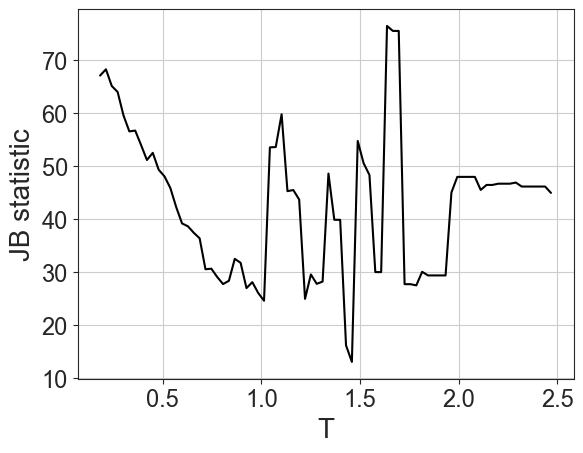

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

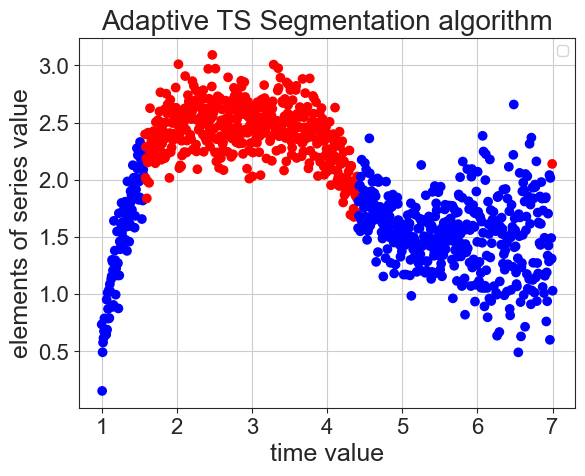

In [94]:
lst = segmentationMultimodalDistr (MotivationData['Y'],bins = 100, classes = 2, stat = 'average')
MotivationData['Adapt_algo']=lst[3]['Adap_Jenks_Class']

plt.figure()
plt.plot(lst[1],lst[2],c='black')
plt.xlabel("T",size=20)
plt.ylabel("JB statistic",size=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.savefig(path+"AdapJenks_JB_Motivation.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_JB_Motivations.png",bbox_inches = 'tight', dpi = 300)
plt.show()

plt.figure()
colors = np.where(MotivationData["Adapt_algo"]==1,'red','blue')
plt.figure()
plt.scatter(x=MotivationData['X'], y = MotivationData['Y'], c = colors)
plt.xlabel("time value",size=18)
plt.ylabel("elements of series value",size=18)
plt.legend()
plt.title('Adaptive TS Segmentation algorithm',size=20)
plt.grid(True)
plt.savefig(path+"Motive_AdaptSegmRes.eps",bbox_inches = 'tight', dpi = 800)
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


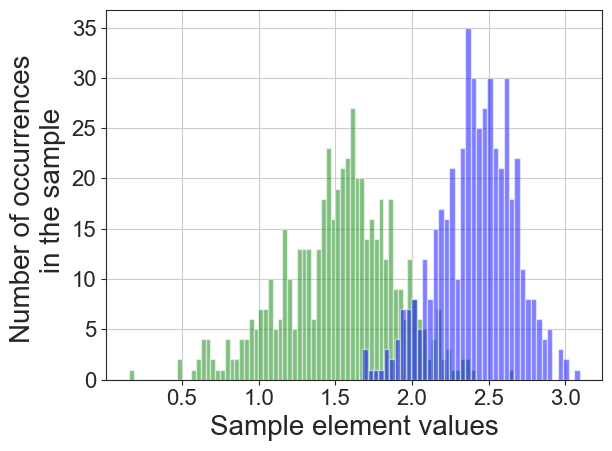

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


JB statistic fot the first class:  SignificanceResult(statistic=13.023805694193634, pvalue=0.001485650066795146)
JB statistic fot the second class:  SignificanceResult(statistic=8.059042292806222, pvalue=0.017782843293649108)


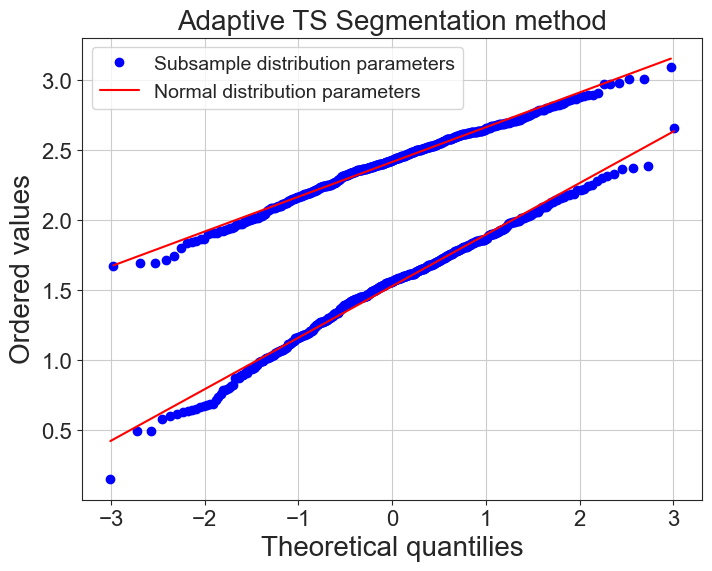

In [95]:
df_left = MotivationData.loc[MotivationData['Adapt_algo'] == 0]
df_right = MotivationData.loc[MotivationData['Adapt_algo'] == 1]

plt.figure()
df_left['Y'].hist(color = 'green', bins = 80, alpha = 0.5)
df_right['Y'].hist(color = 'blue', bins = 40, alpha = 0.5)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"AdapJenks_Motivation.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_Motivation.png",bbox_inches = 'tight', dpi = 300)
plt.show()

cl1 = MotivationData['Y'].loc[MotivationData['Adapt_algo'] == 0].to_numpy()
cl2 = MotivationData['Y'].loc[MotivationData['Adapt_algo'] == 1].to_numpy()
print("JB statistic fot the first class: ", stats.jarque_bera(cl1))
print("JB statistic fot the second class: ", stats.jarque_bera(cl2))
plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Adaptive TS Segmentation method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_Motivation_Adapt_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_Motivation_Adapt_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()



### 2.5.2. Jenks algo

The obtained threshold value for Jenks clustering 1.928051722175067


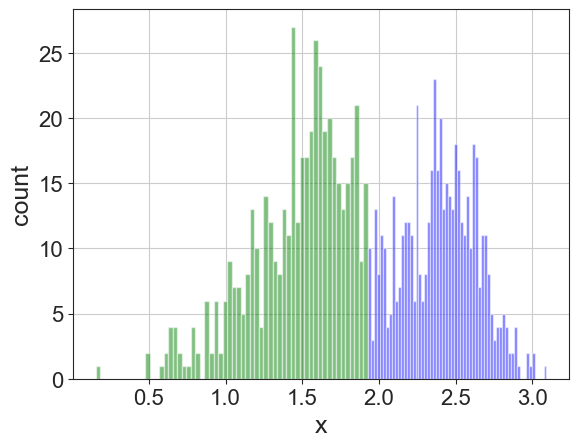

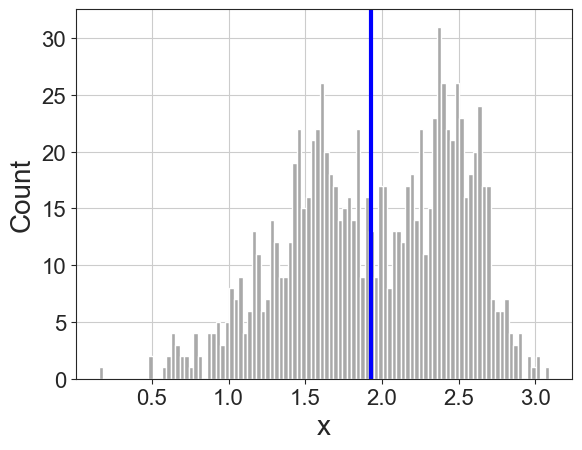

In [97]:
d = MotivationData['Y'].to_numpy().copy()
breaks = get_jenks_breaks(d, 2)
print("The obtained threshold value for Jenks clustering", breaks[1])
MotivationData['Jenks_class'] = np.where(MotivationData['Y']<breaks[1],0,1)

df_left = MotivationData.loc[MotivationData["Jenks_class"] == 0]
df_right = MotivationData.loc[MotivationData["Jenks_class"] == 1]

df_left['Y'].hist(color = 'green', bins = 60, alpha = 0.5)
df_right['Y'].hist(color = 'blue', bins = 60, alpha = 0.5)
plt.xlabel("x",size=18)
plt.ylabel("count",size=18)
plt.show()

plt.hist(MotivationData['Y'], bins = 100, color = 'darkgray')
plt.axvline(x=breaks[1], color ='blue', lw = 3 )
plt.xlabel('x', size= 20)
plt.ylabel('Count', size= 20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.savefig(path+"synt_Motivation_Jenks_Result.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_Motivation_Jenks_Result.png",bbox_inches = 'tight', dpi = 300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


JB statistic for the first class:  SignificanceResult(statistic=65.00462264429757, pvalue=7.663471448190134e-15)
JB statistic for the second class:  SignificanceResult(statistic=8.12170411984521, pvalue=0.017234328177122487)


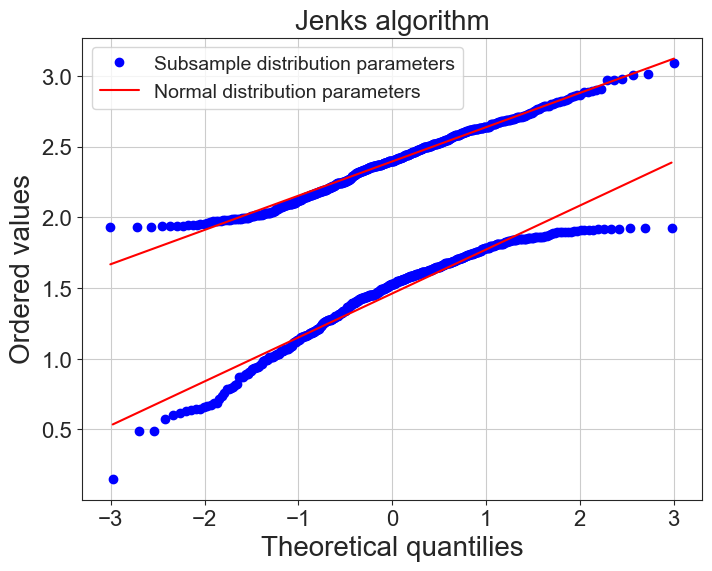

In [98]:
import matplotlib.pyplot as plt
df_left = MotivationData.loc[MotivationData['Jenks_class'] == 0]
df_right = MotivationData.loc[MotivationData['Jenks_class'] == 1]


cl1 = MotivationData['Y'].loc[MotivationData['Jenks_class'] == 0].to_numpy()
cl2 = MotivationData['Y'].loc[MotivationData['Jenks_class'] == 1].to_numpy()
print("JB statistic for the first class: ", stats.jarque_bera(cl1))
print("JB statistic for the second class: ", stats.jarque_bera(cl2))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Jenks algorithm',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_Motivation_Jenks_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_Motivation_Jenks_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 2.6 PM2.5 data

### 2.6.1. Adaptive algo

In [101]:
sens = 'pm25.m_svr'
df = pd.DataFrame()
df[sens] = Rough_DATA_NotAnomalyInPairs[sens]
df['roll_72'] = df[sens].rolling(72, min_periods=1).mean()
df['log10_pm'] = np.log10(df['roll_72']) 

lst = segmentationMultimodalDistr (df['log10_pm'],bins = 100, classes = 2, stat = 'average')
df['Adapt_algo']=lst[3]['Adap_Jenks_Class']


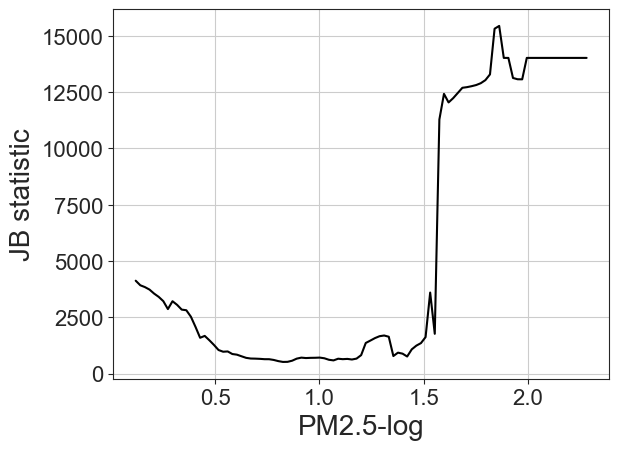

In [102]:

plt.plot(lst[1],lst[2],c='black')
plt.xlabel("PM2.5-log",size=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.ylabel("JB statistic",size=20)
plt.grid(True)
plt.savefig(path+"AdapJenks_JB_PM.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_JB_PM.png",bbox_inches = 'tight', dpi = 300)
plt.ylabel("JB statistic",size=20)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


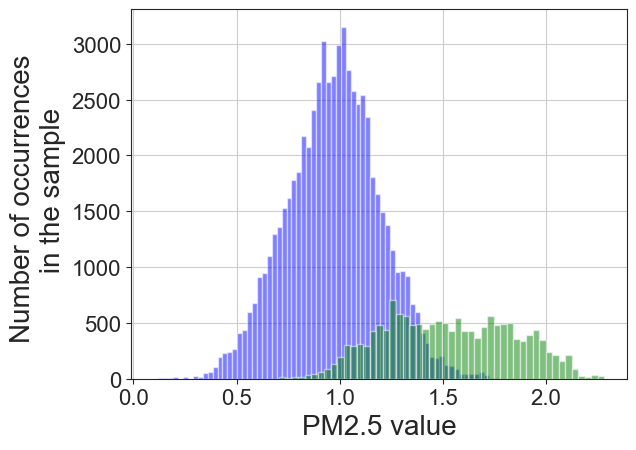

In [103]:
df_left = df.loc[df["Adapt_algo"] == 0]
df_middle = df.loc[df["Adapt_algo"] == 1]

df_left['log10_pm'].hist(color = 'blue', bins = 70, alpha = 0.5)
df_middle['log10_pm'].hist(color = 'green', bins = 50, alpha = 0.5)
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.xlabel('PM2.5 value', size= 20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"AdapJenks_PM.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"AdapJenks_PM.png",bbox_inches = 'tight', dpi = 300)
plt.show()


JB statistic for d_left:  SignificanceResult(statistic=2.3828505746293276, pvalue=0.3037879702156446)
JB statistic for d_right:  SignificanceResult(statistic=515.1573465449852, pvalue=1.364594265200485e-112)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


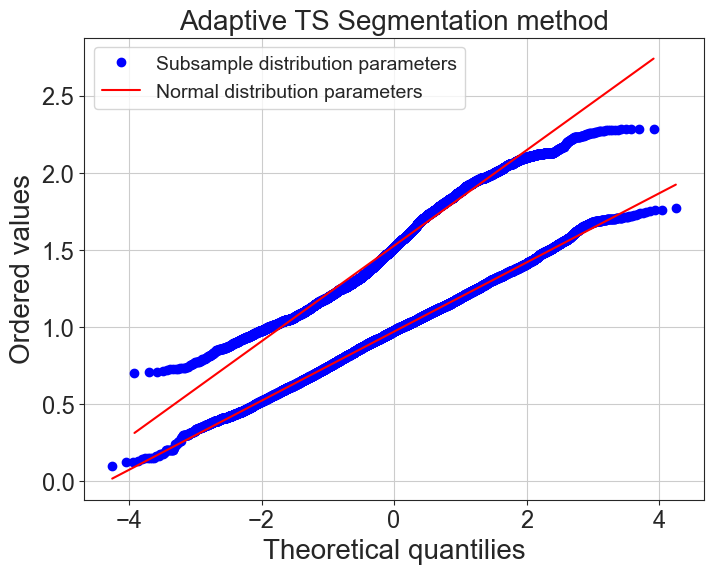

In [104]:
d_left = df_left['log10_pm'].to_numpy()
d_right = df_middle['log10_pm'].to_numpy()
print("JB statistic for d_left: ", stats.jarque_bera(d_left))
print("JB statistic for d_right: ", stats.jarque_bera(d_right))

plt.figure(figsize=(8, 6))

stats.probplot(d_left, dist="norm", plot=plt)
stats.probplot(d_right, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Adaptive TS Segmentation method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"PM_Adapt_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"PM_Adapt_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

### 2.6.2 Jenks algo

In [106]:
sens = 'pm25.m_svr'
df = pd.DataFrame()
df[sens] = Rough_DATA_NotAnomalyInPairs[sens]
df['roll_72'] = df[sens].rolling(72, min_periods=1).mean()
df['log10_pm'] = np.log10(df['roll_72']) 
d = df['log10_pm'].dropna().to_numpy()

print(len(d))
breaks = get_jenks_breaks(d, 2)
print("The obtained threshold value for Jenks clustering", breaks[1])
df['Jenks_class'] = df.apply(fill_classes, axis = 1, args =('log10_pm', breaks))

df_left = df.loc[df["Jenks_class"] == 0]
df_right = df.loc[df["Jenks_class"] == 1]



81278
The obtained threshold value for Jenks clustering 1.2065805812035815


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


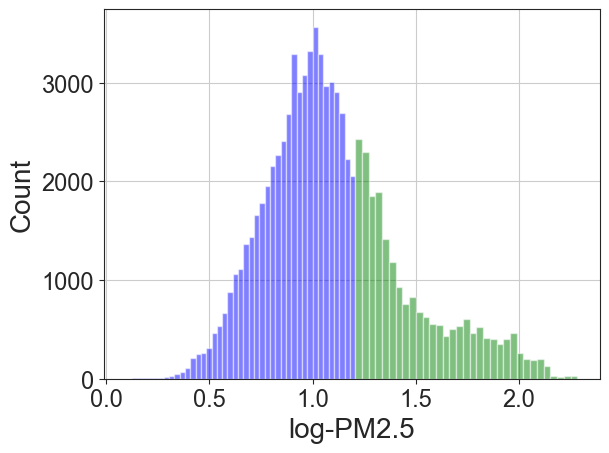

In [107]:
plt.figure()
df_left['log10_pm'].hist(color = 'blue', bins = 43, alpha = 0.5)
df_right['log10_pm'].hist(color = 'green', bins = 33, alpha = 0.5)
plt.xlabel("log-PM2.5",size=20)
plt.ylabel("Count",size=20)
plt.savefig(path+"Jenks_PM.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"Jenks_PM2.png",bbox_inches = 'tight', dpi = 300)
plt.show()

JB statistic for d_left:  SignificanceResult(statistic=3883.8100593637173, pvalue=0.0)
JB statistic for d_right:  SignificanceResult(statistic=2845.7043252155504, pvalue=0.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


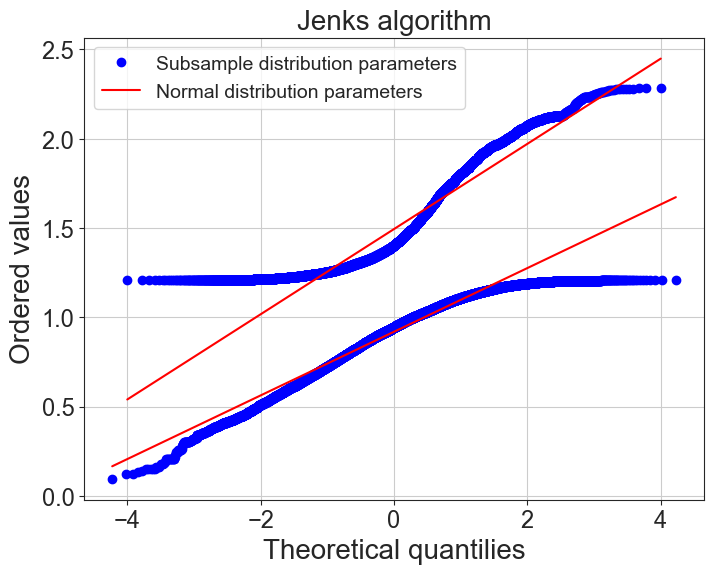

In [108]:
d_left = df_left['log10_pm'].to_numpy()
d_right = df_right['log10_pm'].to_numpy()
print("JB statistic for d_left: ", stats.jarque_bera(d_left))
print("JB statistic for d_right: ", stats.jarque_bera(d_right))

plt.figure(figsize=(8, 6))

stats.probplot(d_left, dist="norm", plot=plt)
stats.probplot(d_right, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('Jenks algorithm',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"PM_Jenks_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"PM_Jenks_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

# 3. GMM algo

## 3.1. Well-separated modes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


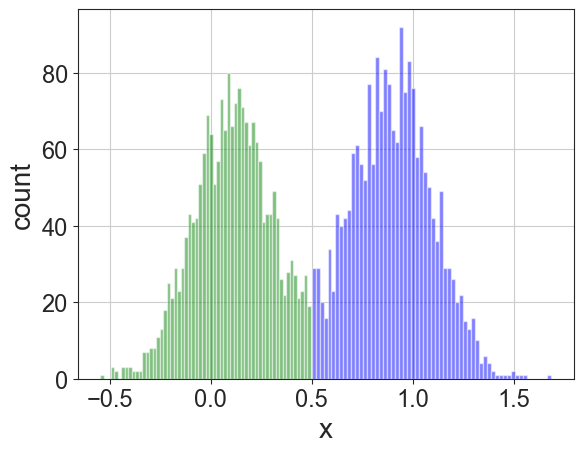

JB statistic for the first class:  SignificanceResult(statistic=16.00309408531165, pvalue=0.0003349440541390046)
JB statistic for the second class:  SignificanceResult(statistic=17.232475712933923, pvalue=0.00018114045077660036)
accuracy:  0.97475
precision:  0.9619764573991032
f1:  0.9747941103069628


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


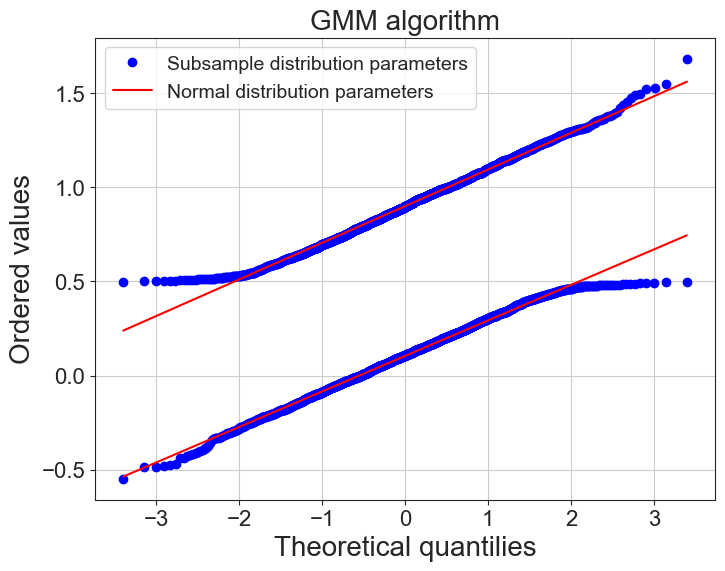

In [111]:
from sklearn.mixture import GaussianMixture

d = bimodal_FarSimilarModes['data'].to_numpy().reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit_predict(d)
bimodal_FarSimilarModes['GMM_class'] = 1-gm  

cl1 = bimodal_FarSimilarModes['data'].loc[bimodal_FarSimilarModes['GMM_class'] == 0].to_numpy()
cl2 = bimodal_FarSimilarModes['data'].loc[bimodal_FarSimilarModes['GMM_class'] == 1].to_numpy()

df_left = bimodal_FarSimilarModes.loc[bimodal_FarSimilarModes['GMM_class'] == 0]
df_right = bimodal_FarSimilarModes.loc[bimodal_FarSimilarModes['GMM_class'] == 1]

plt.figure()
df_left['data'].hist(color = 'green', bins = 60, alpha = 0.5)
df_right['data'].hist(color = 'blue', bins = 60, alpha = 0.5)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.xlabel("x",size=20)
plt.ylabel("count",size=20)
plt.savefig(path+"GMM_TwoFarGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"GMM_TwoFarGoodModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()


print("JB statistic for the first class: ", stats.jarque_bera(cl1))
print("JB statistic for the second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['GMM_class']))
print('precision: ', average_precision_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['GMM_class']))
print('f1: ', f1_score(bimodal_FarSimilarModes['true_class'],bimodal_FarSimilarModes['GMM_class']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('GMM algorithm',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoFarGoodModes_GMM_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarGoodModes_GMM_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 3.2. Weak-separated modes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


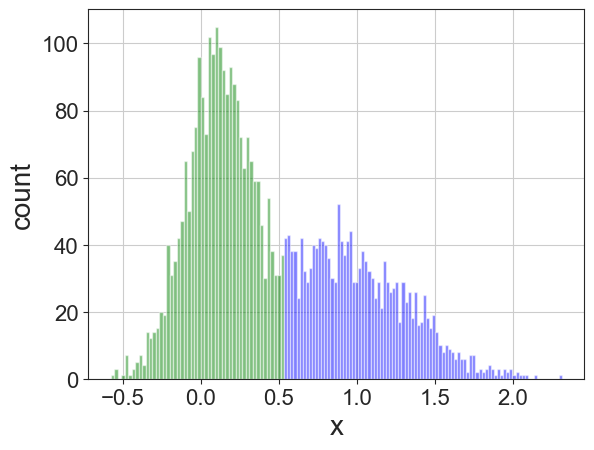

JB statistic for the first class:  SignificanceResult(statistic=25.181792233176356, pvalue=3.4028538301918077e-06)
JB statistic for the second class:  SignificanceResult(statistic=112.45744008266455, pvalue=3.803445184595084e-25)
accuracy:  0.90225
precision:  0.89525224955009
f1:  0.8933733296973002


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


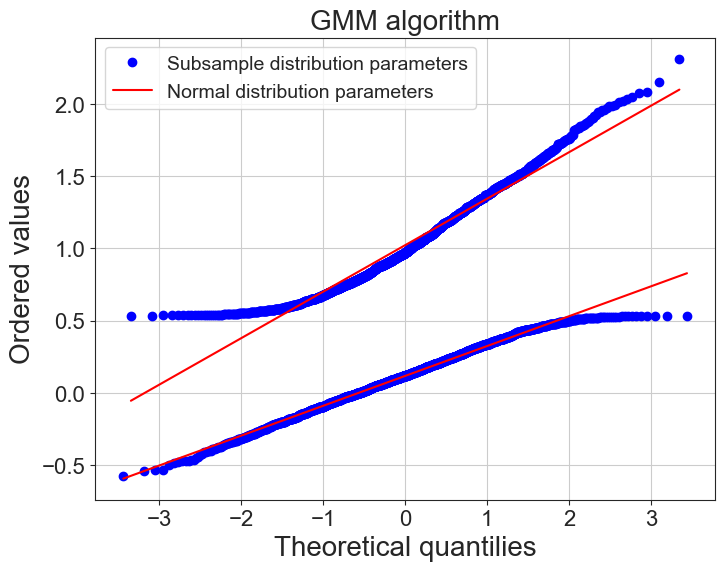

In [113]:
d = bimodal_FarDifferentModes['data'].to_numpy().reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit_predict(d)
bimodal_FarDifferentModes['GMM_class'] = 1-gm  

cl1 = bimodal_FarDifferentModes['data'].loc[bimodal_FarDifferentModes['GMM_class'] == 0].to_numpy()
cl2 = bimodal_FarDifferentModes['data'].loc[bimodal_FarDifferentModes['GMM_class'] == 1].to_numpy()

df_left = bimodal_FarDifferentModes.loc[bimodal_FarDifferentModes['GMM_class'] == 0]
df_right = bimodal_FarDifferentModes.loc[bimodal_FarDifferentModes['GMM_class'] == 1]

plt.figure()
df_left['data'].hist(color = 'green', bins = 50, alpha = 0.5)
df_right['data'].hist(color = 'blue', bins = 90, alpha = 0.5)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.xlabel("x",size=20)
plt.ylabel("count",size=20)
plt.savefig(path+"GMM_TwoFarBadModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"GMM_TwoFarBadModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()


print("JB statistic for the first class: ", stats.jarque_bera(cl1))
print("JB statistic for the second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['GMM_class']))
print('precision: ', average_precision_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['GMM_class']))
print('f1: ', f1_score(bimodal_FarDifferentModes['true_class'],bimodal_FarDifferentModes['GMM_class']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('GMM algorithm',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoFarBadModes_GMM_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoFarBadModes_GMM_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 3.3. Fuzzy modes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


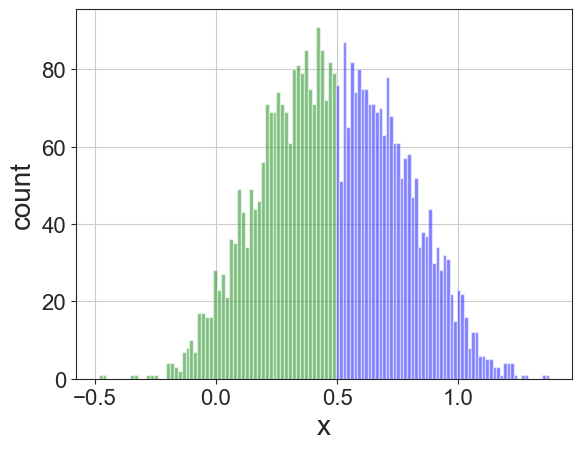

JB statistic for the first class:  SignificanceResult(statistic=183.2394149657339, pvalue=1.6220588491766242e-40)
JB statistic for the second class:  SignificanceResult(statistic=176.5796530868933, pvalue=4.5312239168420005e-39)
accuracy:  0.84175
precision:  0.7861123581647755
f1:  0.8428110255773529


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


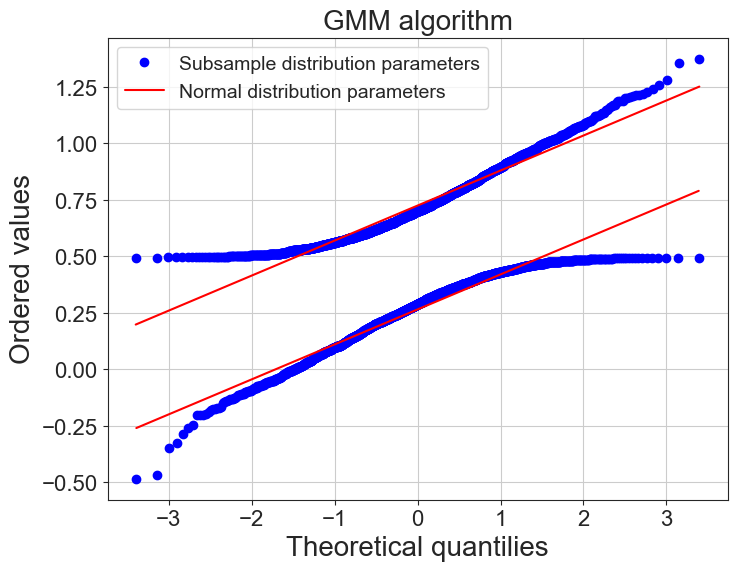

In [115]:
d = bimodal_NearSimilarModes['data'].to_numpy().reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0, init_params='kmeans').fit_predict(d)
bimodal_NearSimilarModes['GMM_class'] = 1-gm  

cl1 = bimodal_NearSimilarModes['data'].loc[bimodal_NearSimilarModes['GMM_class'] == 0].to_numpy()
cl2 = bimodal_NearSimilarModes['data'].loc[bimodal_NearSimilarModes['GMM_class'] == 1].to_numpy()

df_left = bimodal_NearSimilarModes.loc[bimodal_NearSimilarModes['GMM_class'] == 0]
df_right = bimodal_NearSimilarModes.loc[bimodal_NearSimilarModes['GMM_class'] == 1]

plt.figure()
df_left['data'].hist(color = 'green', bins = 60, alpha = 0.5)
df_right['data'].hist(color = 'blue', bins = 60, alpha = 0.5)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.xlabel("x",size=20)
plt.ylabel("count",size=20)
plt.savefig(path+"GMM_TwoNearGoodModes.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"GMM_TwoNearGoodModes.png",bbox_inches = 'tight', dpi = 300)
plt.show()

print("JB statistic for the first class: ", stats.jarque_bera(cl1))
print("JB statistic for the second class: ", stats.jarque_bera(cl2))

print('accuracy: ', accuracy_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['GMM_class']))
print('precision: ', average_precision_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['GMM_class']))
print('f1: ', f1_score(bimodal_NearSimilarModes['true_class'],bimodal_NearSimilarModes['GMM_class']))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('GMM algorithm',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_TwoNearGoodModes_GMM_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_TwoNearGoodModes_GMM_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 3.4. Temperature data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


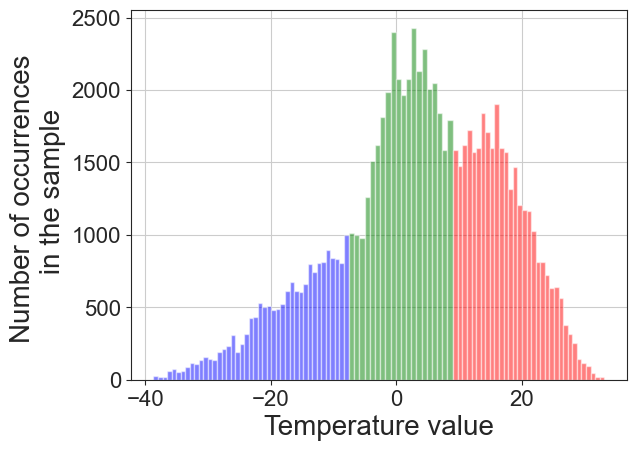

In [117]:
sens = 't.m_vet'
df = pd.DataFrame()
df[sens] = Rough_DATA_NotAnomalyInPairs[sens]
df = df.dropna()
d = df[sens].to_numpy().reshape(-1,1)
gm = GaussianMixture(n_components=3, random_state=0, init_params='kmeans').fit_predict(d)
df['GMM_label'] = gm
df_left = df.loc[df["GMM_label"] == 2]
df_mid = df.loc[df["GMM_label"] == 1]
df_right = df.loc[df["GMM_label"] == 0]

plt.figure()
df_left[sens].hist(color = 'blue', bins = 43, alpha = 0.5)
df_mid[sens].hist(color = 'green', bins = 20, alpha = 0.5)
df_right[sens].hist(color = 'red', bins = 33, alpha = 0.5)
plt.xlabel('Temperature value', size= 20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"GMM_Temperature.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"GMM_Temperature.png",bbox_inches = 'tight', dpi = 300)
plt.show()

JB statistic for d_left:  SignificanceResult(statistic=1709.266036178979, pvalue=0.0)
JB statistic for d_middle:  SignificanceResult(statistic=1502.6231162989845, pvalue=0.0)
JB statistic for d_right:  SignificanceResult(statistic=1702.235750437441, pvalue=0.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


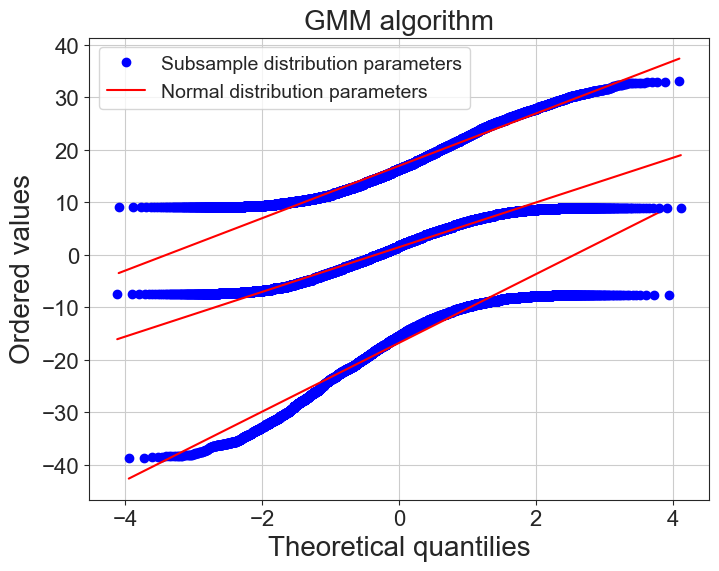

In [118]:
d_left = df_left[sens].to_numpy()
d_middle = df_mid[sens].to_numpy()
d_right = df_right[sens].to_numpy()
print("JB statistic for d_left: ", stats.jarque_bera(d_left))
print("JB statistic for d_middle: ", stats.jarque_bera(d_middle))
print("JB statistic for d_right: ", stats.jarque_bera(d_right))

plt.figure(figsize=(8, 6))

stats.probplot(d_left, dist="norm", plot=plt)
stats.probplot(d_middle, dist="norm", plot=plt)
stats.probplot(d_right, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('GMM algorithm',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"Temp_GMM_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"Temp_GMM_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 3.5. PM2.5 data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


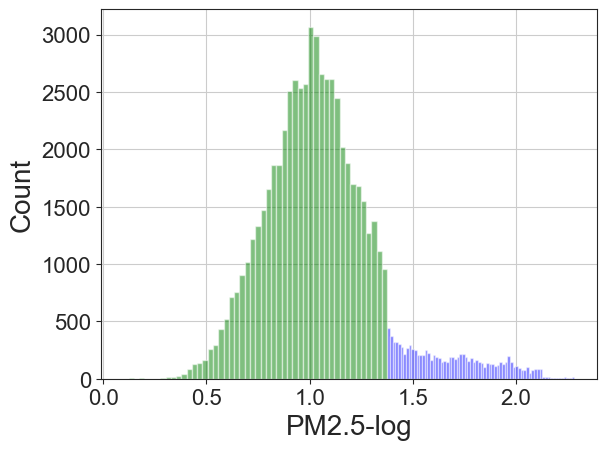

JB statistic d_left:  SignificanceResult(statistic=1709.266036178979, pvalue=0.0)
JB statisitc d_middle:  SignificanceResult(statistic=1502.6231162989845, pvalue=0.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


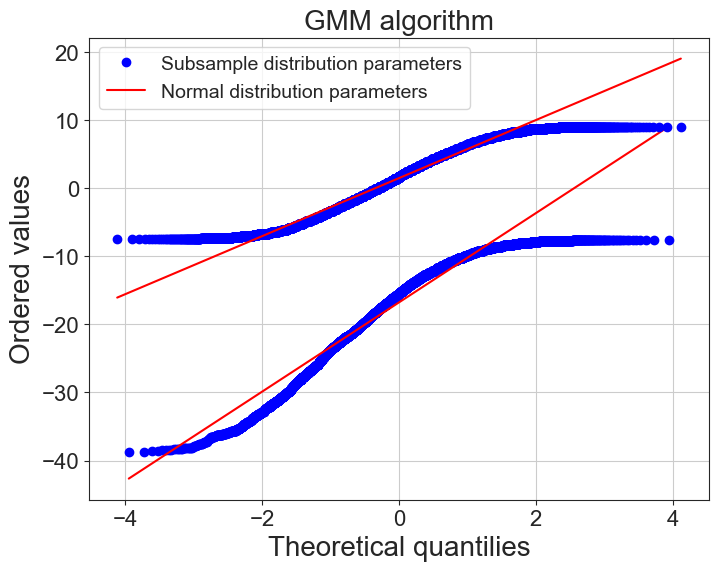

In [120]:
sens = 'pm25.m_svr'
df = pd.DataFrame()
df[sens] = Rough_DATA_NotAnomalyInPairs[sens]
df['roll_72'] = df[sens].rolling(72, min_periods=1).mean()
df['log10_pm'] = np.log10(df['roll_72']) 
df = df.dropna()
d = df['log10_pm'].to_numpy().reshape(-1,1)
gm = GaussianMixture(n_components=2, random_state=0, init_params='kmeans').fit_predict(d)
df['GMM_label'] = gm
df_left = df.loc[df["GMM_label"] == 0]
df_middle = df.loc[df["GMM_label"] == 1]

df_left['log10_pm'].hist(color = 'blue', bins = 70, alpha = 0.5)
df_middle['log10_pm'].hist(color = 'green', bins = 50, alpha = 0.5)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.xlabel("PM2.5-log",size=20)
plt.ylabel("Count",size=20)
plt.savefig(path+"GMM_PM.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"GMM_PM.png",bbox_inches = 'tight', dpi = 300)
plt.show()


print("JB statistic d_left: ", stats.jarque_bera(d_left))
print("JB statisitc d_middle: ", stats.jarque_bera(d_middle))

plt.figure(figsize=(8, 6))

stats.probplot(d_left, dist="norm", plot=plt)
stats.probplot(d_middle, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('GMM algorithm',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"PM_GMM_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"PM_GMM_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

## 3.6. Non-stationary TS

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


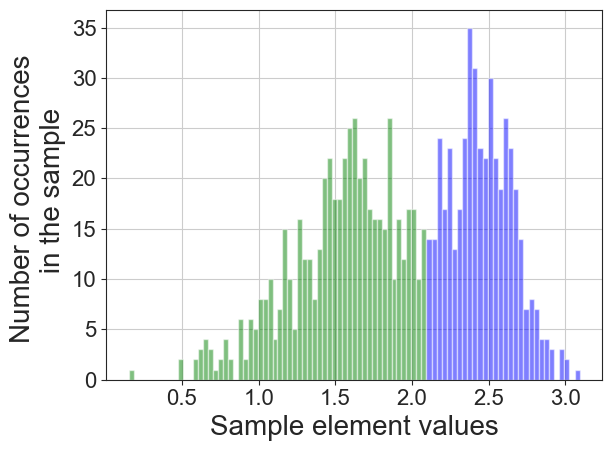

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


JB statistic for the first class:  SignificanceResult(statistic=42.79858849256201, pvalue=5.086330685480259e-10)
JB statistic for the second class:  SignificanceResult(statistic=9.218422116171643, pvalue=0.009959672812400297)


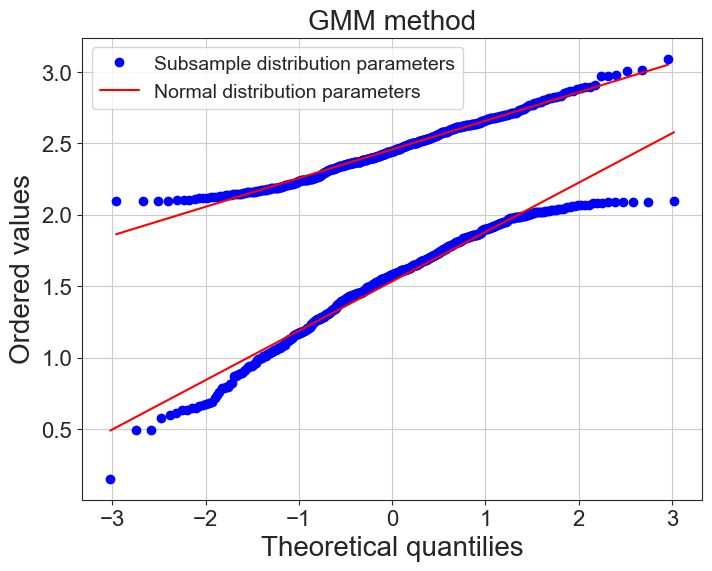

In [122]:
d = MotivationData['Y'].to_numpy().reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit_predict(d)
MotivationData['GMM_class'] = 1-gm  

cl1 = MotivationData['Y'].loc[MotivationData['GMM_class'] == 0].to_numpy()
cl2 = MotivationData['Y'].loc[MotivationData['GMM_class'] == 1].to_numpy()

df_left = MotivationData.loc[MotivationData['GMM_class'] == 0]
df_right = MotivationData.loc[MotivationData['GMM_class'] == 1]

plt.figure()
df_left['Y'].hist(color = 'green', bins = 60, alpha = 0.5)
df_right['Y'].hist(color = 'blue', bins = 30, alpha = 0.5)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.xlabel('Sample element values', size=20)
plt.ylabel('Number of occurrences \n in the sample', size= 20)
plt.savefig(path+"GMM_Motivation.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"GMM_Motivation.png",bbox_inches = 'tight', dpi = 300)
plt.show()


print("JB statistic for the first class: ", stats.jarque_bera(cl1))
print("JB statistic for the second class: ", stats.jarque_bera(cl2))

plt.figure(figsize=(8, 6))

stats.probplot(cl1, dist="norm", plot=plt)
stats.probplot(cl2, dist="norm", plot=plt)

# Customize the plot to make it clearer
plt.title('GMM method',size=20)
plt.legend(['Subsample distribution parameters', 'Normal distribution parameters'],fontsize=14)
plt.xlabel('Theoretical quantilies', fontsize=20)
plt.ylabel('Ordered values', fontsize=20)
plt.grid(True)
plt.savefig(path+"synt_Motivation_GMM_qq.eps",bbox_inches = 'tight', dpi = 300)
plt.savefig(path+"synt_Motivation_GMM_qq.png",bbox_inches = 'tight', dpi = 300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


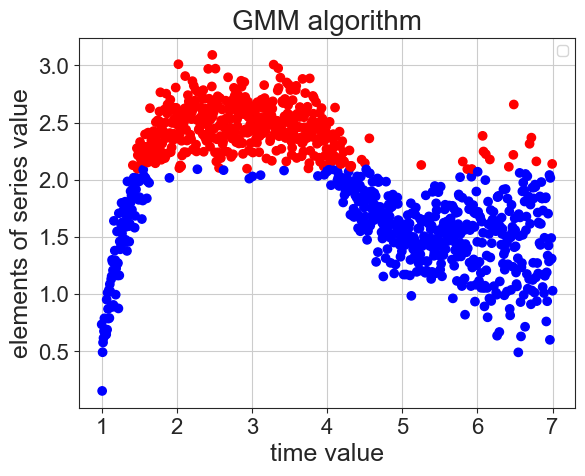

In [123]:

colors = np.where(MotivationData["GMM_class"]==1,'red','blue')
#plt.figure(figsize=(10,5))
plt.figure()
plt.scatter(x=MotivationData['X'], y = MotivationData['Y'], c = colors)
plt.xlabel("time value",size=18)
plt.ylabel("elements of series value",size=18)
plt.legend()
plt.title('GMM algorithm',size=20)
plt.grid(True)
plt.savefig(path+"Motive_GMMSegmRes.eps",bbox_inches = 'tight', dpi = 300)
plt.show()